# **Intro**
## What is Shake Shack?
Shake Shack is an American fast casual restaurant chain based in New York City. It started out as a hot dog cart inside Madison Square Park in 2001, and its popularity steadily grew. It sells chicken burgers, fries, hot dogs, frozen custards, and beer and wine.  
(source: [Wikipedia](https://en.wikipedia.org/wiki/Shake_Shack))
## Objective
Nowadays, people are starting to become interested in health. Because of threats that come from the environment such as PM2.5 or Covid-19, taking care of your body from the inside to the outside for good health is important. Choosing what to put into the body is something that people are increasingly considering by looking at the amount of calories or the nutrients that are included. Excess calories that are not utilized by the body are stored as fat, which can lead to health issues such as cardiovascular disease and obesity. On the other hand, insufficient calorie intake can result in loss of fat mass and lack of energy. Therefore, it has led to the emergence of more health-related food businesses, such as clean, flour-free snacks, low-calorie yogurt, and other low-calorie foods. 

Although at present there are formulas or applications for calculating it, if we have a model that can calculate calories as accurately as using a formula could provide our business with a competitive advantage in verifying the accuracy of such information. Because there are many cases where businesses lie about calories. For example, the food was higher in calories than the company told people. This causes people to misunderstand and eat that often because they think it is safe. Therefore, having a calorie calculation model could help us ensure the accuracy of our business's nutritional information.


# **Import Libaries**

In [1]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_style('white')

In [2]:
print(f'pandas version: {pd.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'numpy version: {np.__version__}')
pd.Timestamp.now()

pandas version: 2.1.4
seaborn version: 0.13.2
numpy version: 1.24.3


Timestamp('2024-03-31 16:00:37.074646')

# **Load data**

In [171]:
df0 = pd.read_csv('https://raw.githubusercontent.com/Nongnapat-Veerabanjerd/project/main/data/shake%20shack%20nutrition.csv')
df0.head()

Category                 Menu Calories Total Fat Sat Fat  Trans Fat  \
0  Burgers  Single ShackBurger®      500        30      12        1.0   
1  Burgers  Double ShackBurger®      760        48      20        2.0   
2  Burgers     Single Hamburger      370        18       8        1.0   
3  Burgers     Double Hamburger      560        30      12        1.5   
4  Burgers  Single Cheeseburger      440        24      11        1.0   

   Cholesterol Sodium Total Carb  Fiber Sugars Protein  
0          105   1250         26      0      6      29  
1          185   2280         27      0      6      51  
2           75    850         24      0      5      25  
3          140   1540         24      0      5      44  
4           95   1200         25      0      5      29

# **Getting to know the data and cleaning data**
We explore the data to determine the number of rows and columns, the type of each column, and identify any rows with null values. Cleaning data that are unnecessary. 

In [172]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category     154 non-null    object 
 1   Menu         154 non-null    object 
 2   Calories     154 non-null    object 
 3   Total Fat    154 non-null    object 
 4   Sat Fat      154 non-null    object 
 5   Trans Fat    154 non-null    float64
 6   Cholesterol  154 non-null    int64  
 7   Sodium       154 non-null    object 
 8   Total Carb   154 non-null    object 
 9   Fiber        154 non-null    int64  
 10  Sugars       154 non-null    object 
 11  Protein      154 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 14.6+ KB


In [173]:
# check null values
df0.isnull().sum()

Category       0
Menu           0
Calories       0
Total Fat      0
Sat Fat        0
Trans Fat      0
Cholesterol    0
Sodium         0
Total Carb     0
Fiber          0
Sugars         0
Protein        0
dtype: int64

In [174]:
# check duplicate data
df0.duplicated().sum()

0

The dataset consists of 154 samples and 12 columns. There are no null values, no rows have duplicate data, and some columns should be of type float or int, not object.

The next step is to survey the Category column to look the categories present and the number of items in each category.

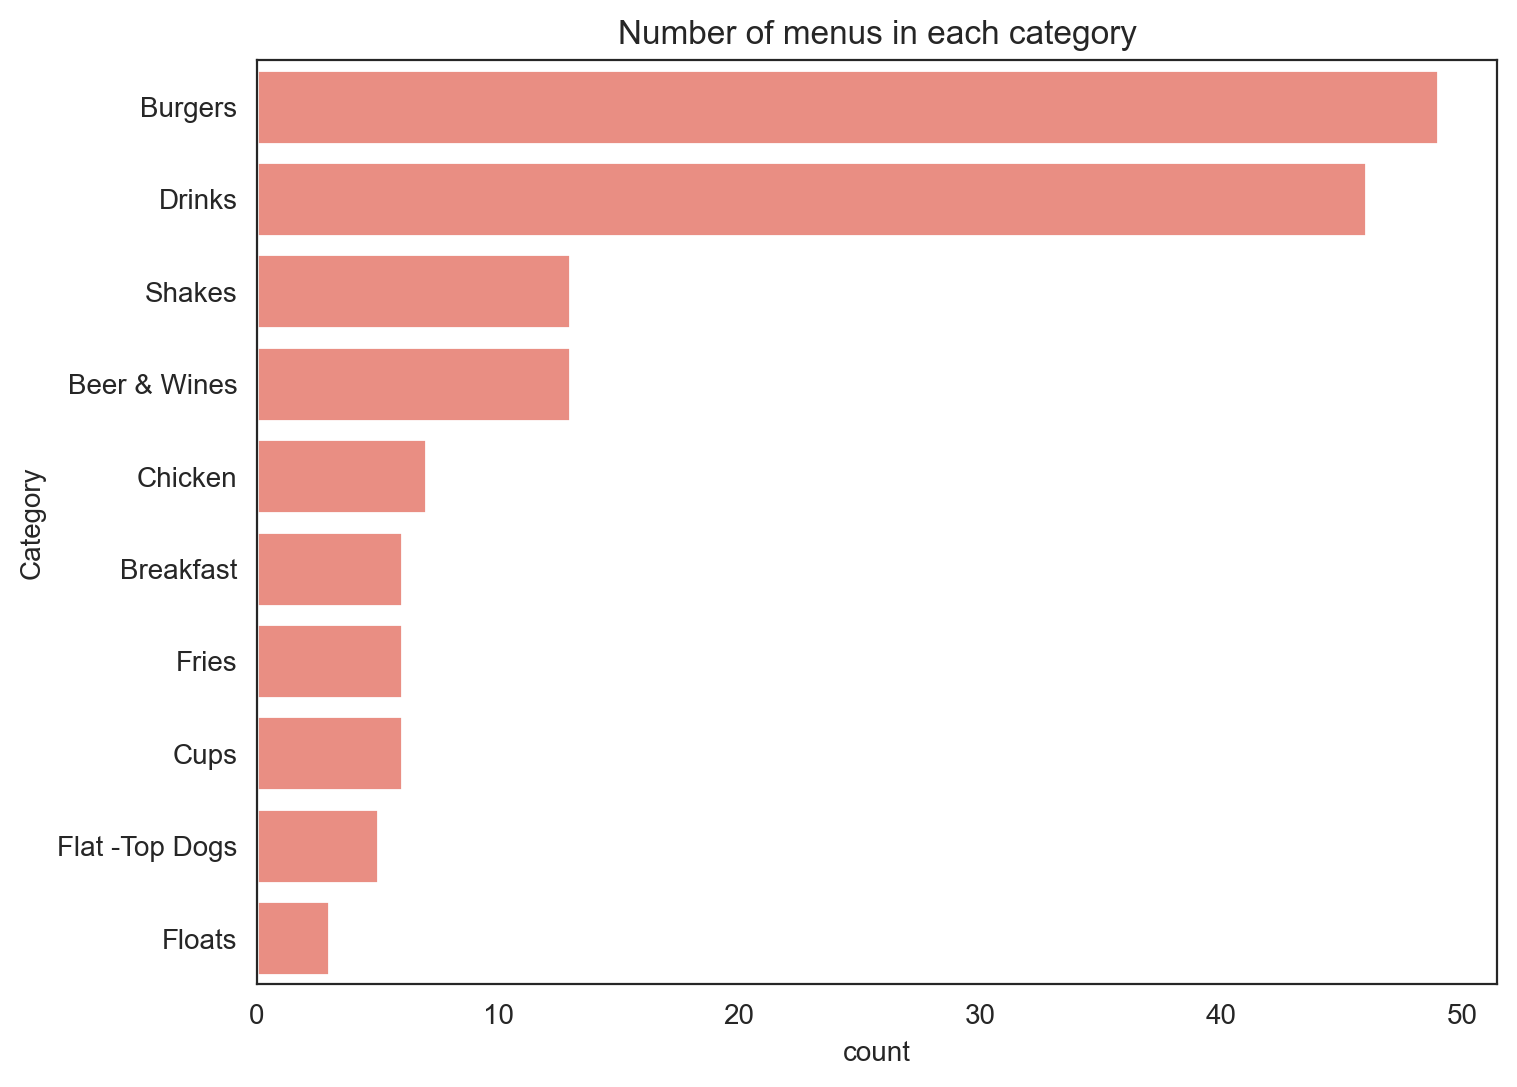

In [176]:
plt.figure(figsize=(8,6))
sns.countplot(y = 'Category', data=df0, color= 'salmon', order = df0['Category'].value_counts().index)
plt.title('Number of menus in each category');

The burgers category has the highest number of menus, followed by drinks and shakes. The floats category has the lowest number.

Based on the previous exploration, the data requires cleaning as follows:
* Data from the 'drinks' category will be averaged between the two values (only rows containing '-' between numbers)
* Columns containing numerical data will be converted to float type
* Rename the columns using the snake case method to make it convenient when using columns

In [177]:
# find data that contain '-'
df0[df0['Calories'].str.contains('-')]

Category                     Menu   Calories Total Fat Sat Fat  Trans Fat  \
97   Drinks  Featured Lemonade Small  150 - 230     0 - 4   0 - 4        0.0   
98   Drinks  Featured Lemonade Large  250 - 380     0 - 7   0 - 7        0.0   

    Cholesterol   Sodium Total Carb  Fiber   Sugars Protein  
97            0   5 - 15    39 - 50      0  36 - 47   0 - 1  
98            0  10 - 25    64 - 81      0  59 - 79   0 - 1

In [178]:
# split data and change data type
def clean_data(value):
    n1 = value.split('-')
    n2 = [float(n.strip()) for n in n1]
    
    if len(n2) == 2:
        return sum(n2)/2
    else:
        return n2[0]

columns = ['Calories', 'Total Fat', 'Sat Fat', 'Sodium', 'Total Carb', 'Sugars', 'Protein']
for column in columns:
    df0[column] = df0[column].map(clean_data)

In [179]:
# rename columns
def rename_column(column_name):
    column_lower = column_name.lower()
    return column_lower.replace(' ', '_')

df0.columns = [rename_column(col) for col in df0.columns]

In [180]:
# check data type again
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category     154 non-null    object 
 1   menu         154 non-null    object 
 2   calories     154 non-null    float64
 3   total_fat    154 non-null    float64
 4   sat_fat      154 non-null    float64
 5   trans_fat    154 non-null    float64
 6   cholesterol  154 non-null    int64  
 7   sodium       154 non-null    float64
 8   total_carb   154 non-null    float64
 9   fiber        154 non-null    int64  
 10  sugars       154 non-null    float64
 11  protein      154 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 14.6+ KB


All numeric columns are now of float or int type.

Types Of Variables in this data
- Norminal: category
- Continuous: calories, total_fat, sat_fat, trans_fat, cholesterol, sodium, total_carb, fiber, sugars and protein
- Identifier: menu

In [181]:
# explore all numeric columns
df0.describe().T.round(3)

count     mean      std  min    25%    50%      75%     max
calories     154.0  402.545  340.194  0.0  150.0  310.0   677.50  1910.0
total_fat    154.0   20.221   23.728  0.0    0.0   13.5    37.75   117.0
sat_fat      154.0    8.692   10.440  0.0    0.0    3.5    16.00    49.0
trans_fat    154.0    0.364    0.670  0.0    0.0    0.0     0.50     2.5
cholesterol  154.0   82.500  103.627  0.0    0.0   15.0   145.00   445.0
sodium       154.0  705.568  921.004  0.0   40.0  225.0  1192.50  4110.0
total_carb   154.0   34.766   29.216  0.0   15.0   28.0    49.75   164.0
fiber        154.0    0.474    1.812  0.0    0.0    0.0     0.00    16.0
sugars       154.0   20.906   27.881  0.0    1.0    6.0    38.75   108.0
protein      154.0   15.182   19.639  0.0    0.0    6.0    25.00    83.0

#### Correlation between the variables

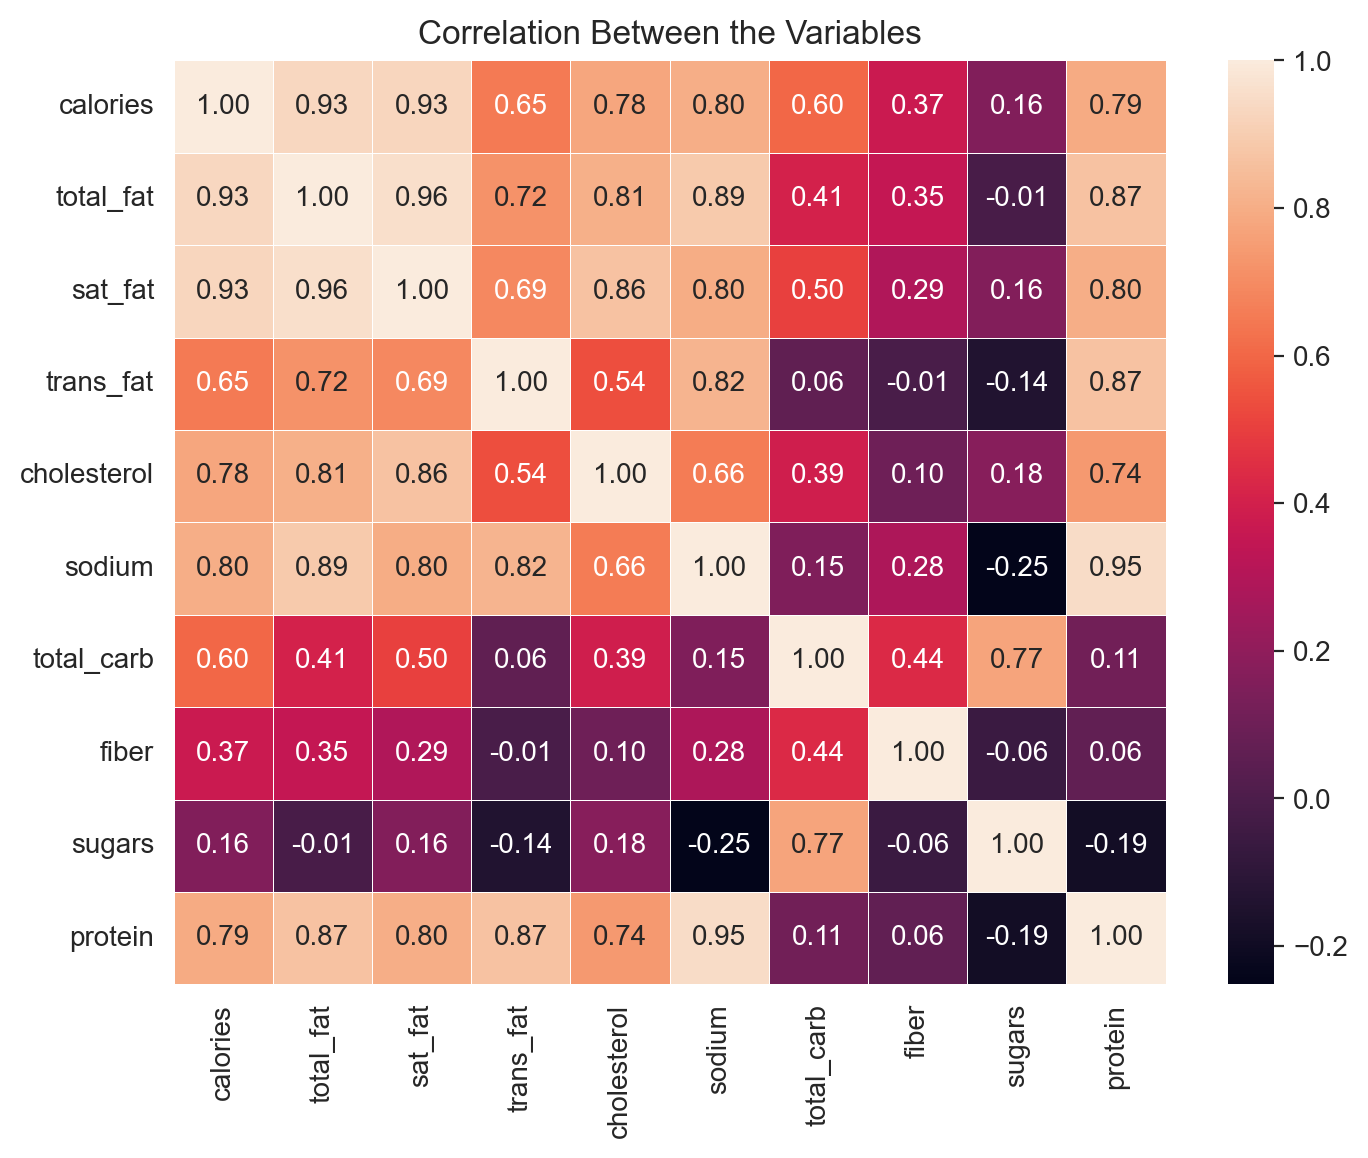

In [199]:
# show heatmap to find correlation between the variables
correlation = df0.iloc[:, 2:].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, fmt='.2f', linewidths='0.2')
plt.title('Correlation Between the Variables');

We created a heatmap to explore multicollinearity. From the above heatmap, we can see some features are correlated. The highest correlation are between 'sat_fat' and 'total_fat', 'sodium' and 'protein'. However, I still not remove any features because I want to see the results when using all features with each model.

Next step, I explore the distribution of data, the correlation of each feature and determine if each feature has an outlier or not by considering histogram, boxplot and scatter plot.

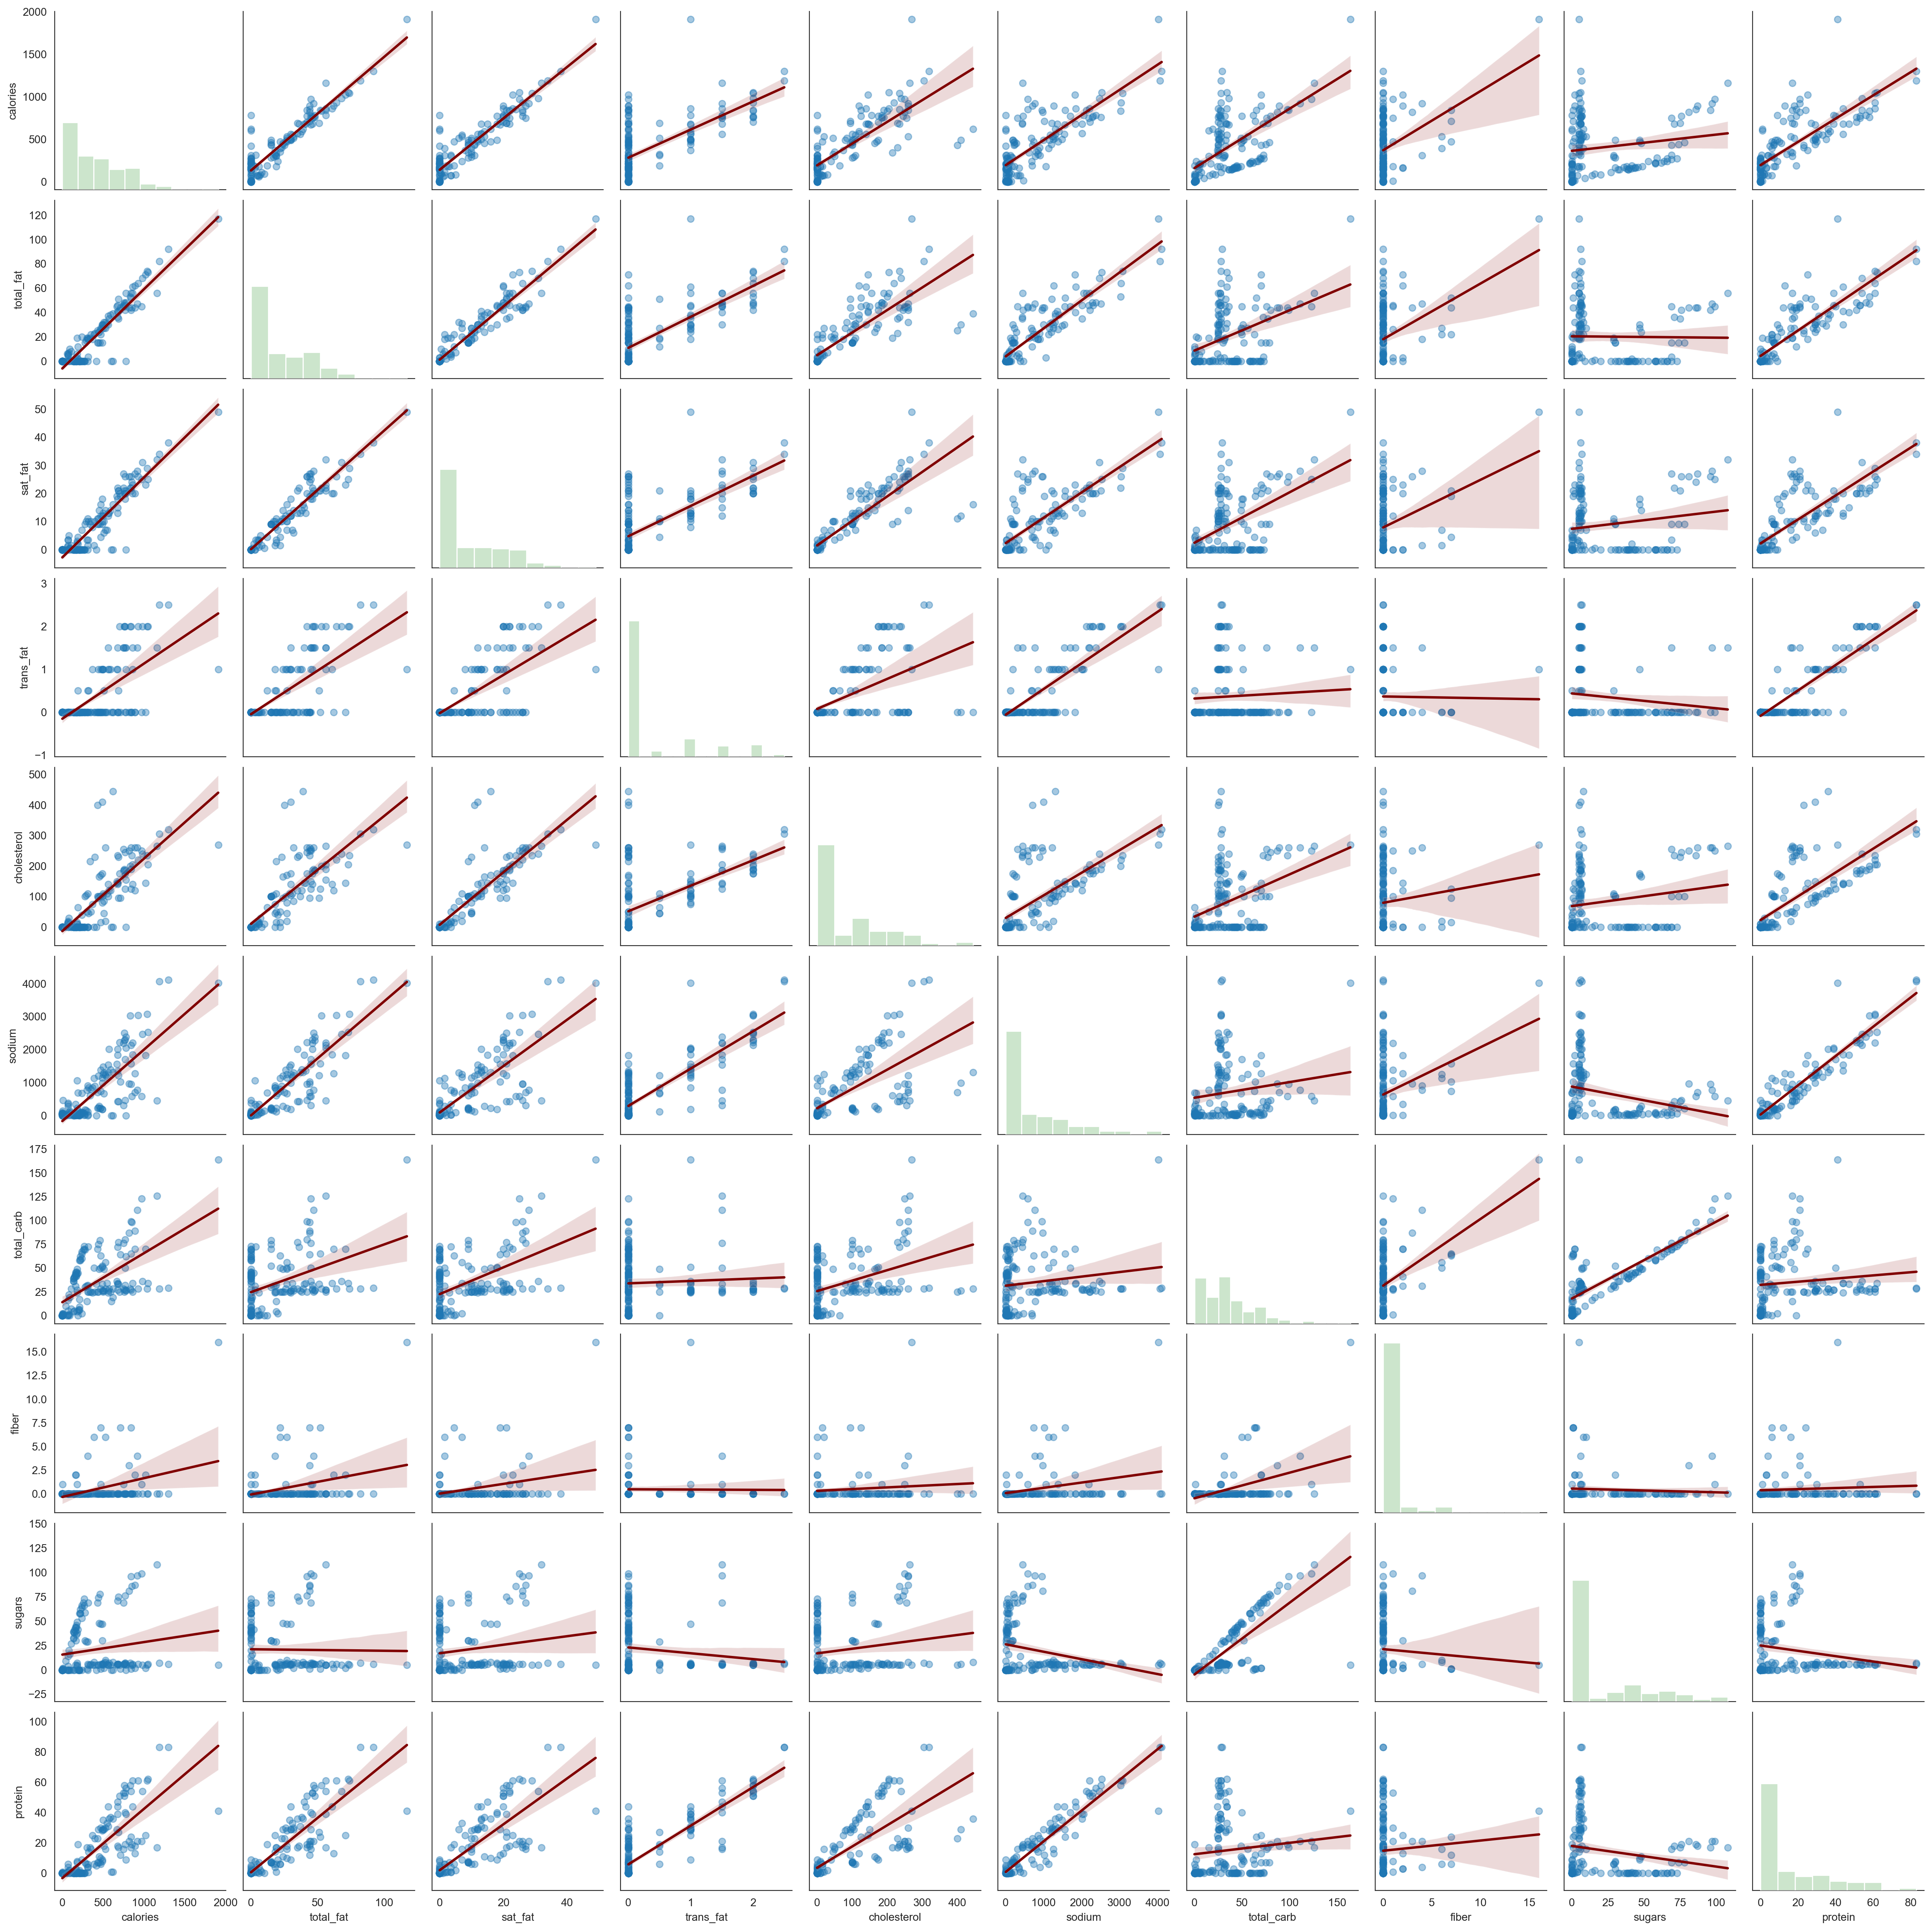

In [15]:
# before drop outlier
sns.pairplot(df0, kind='reg', 
             plot_kws={'scatter_kws': {'alpha':0.4},
                       'line_kws': {'color': 'maroon'}},
             diag_kws={'color': 'green', 'alpha':0.2});

To make it easier to explore the data, I removed unnecessary columns.

In [183]:
# remove the unnecessary columns
df1 = df0.drop(['category', 'menu'], axis = 1)

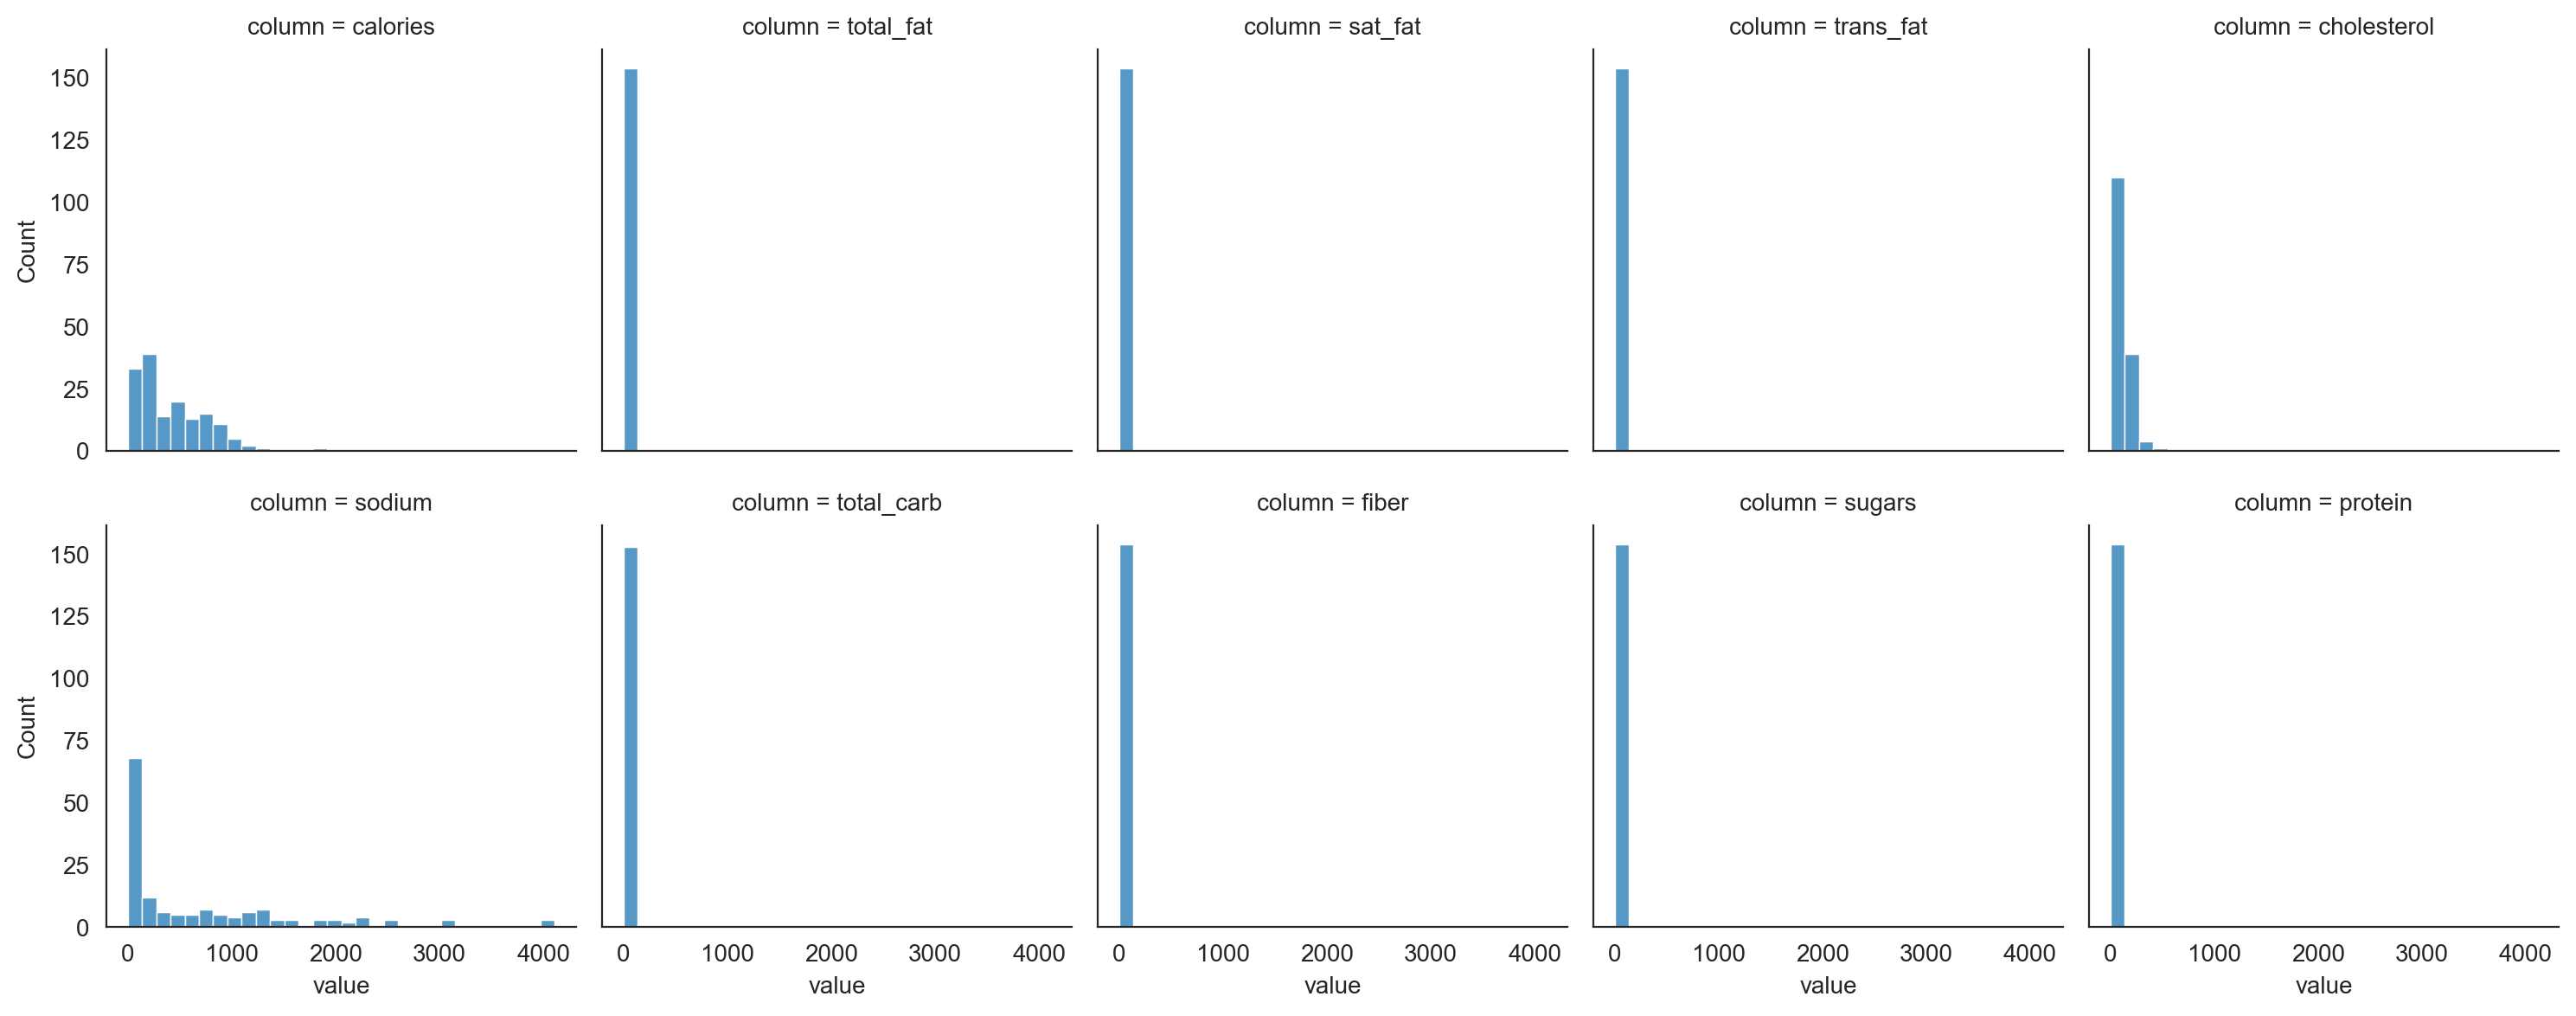

In [17]:
# create histogram using catplot before drop outlier
columns = ['calories', 'total_fat', 'sat_fat', 'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugars', 'protein']
df_long = pd.melt(df1[columns], var_name='column', value_name='value')

sns.displot(data=df_long, x='value', kind='hist', col='column', col_wrap=5, aspect=1, height=3, bins=30);

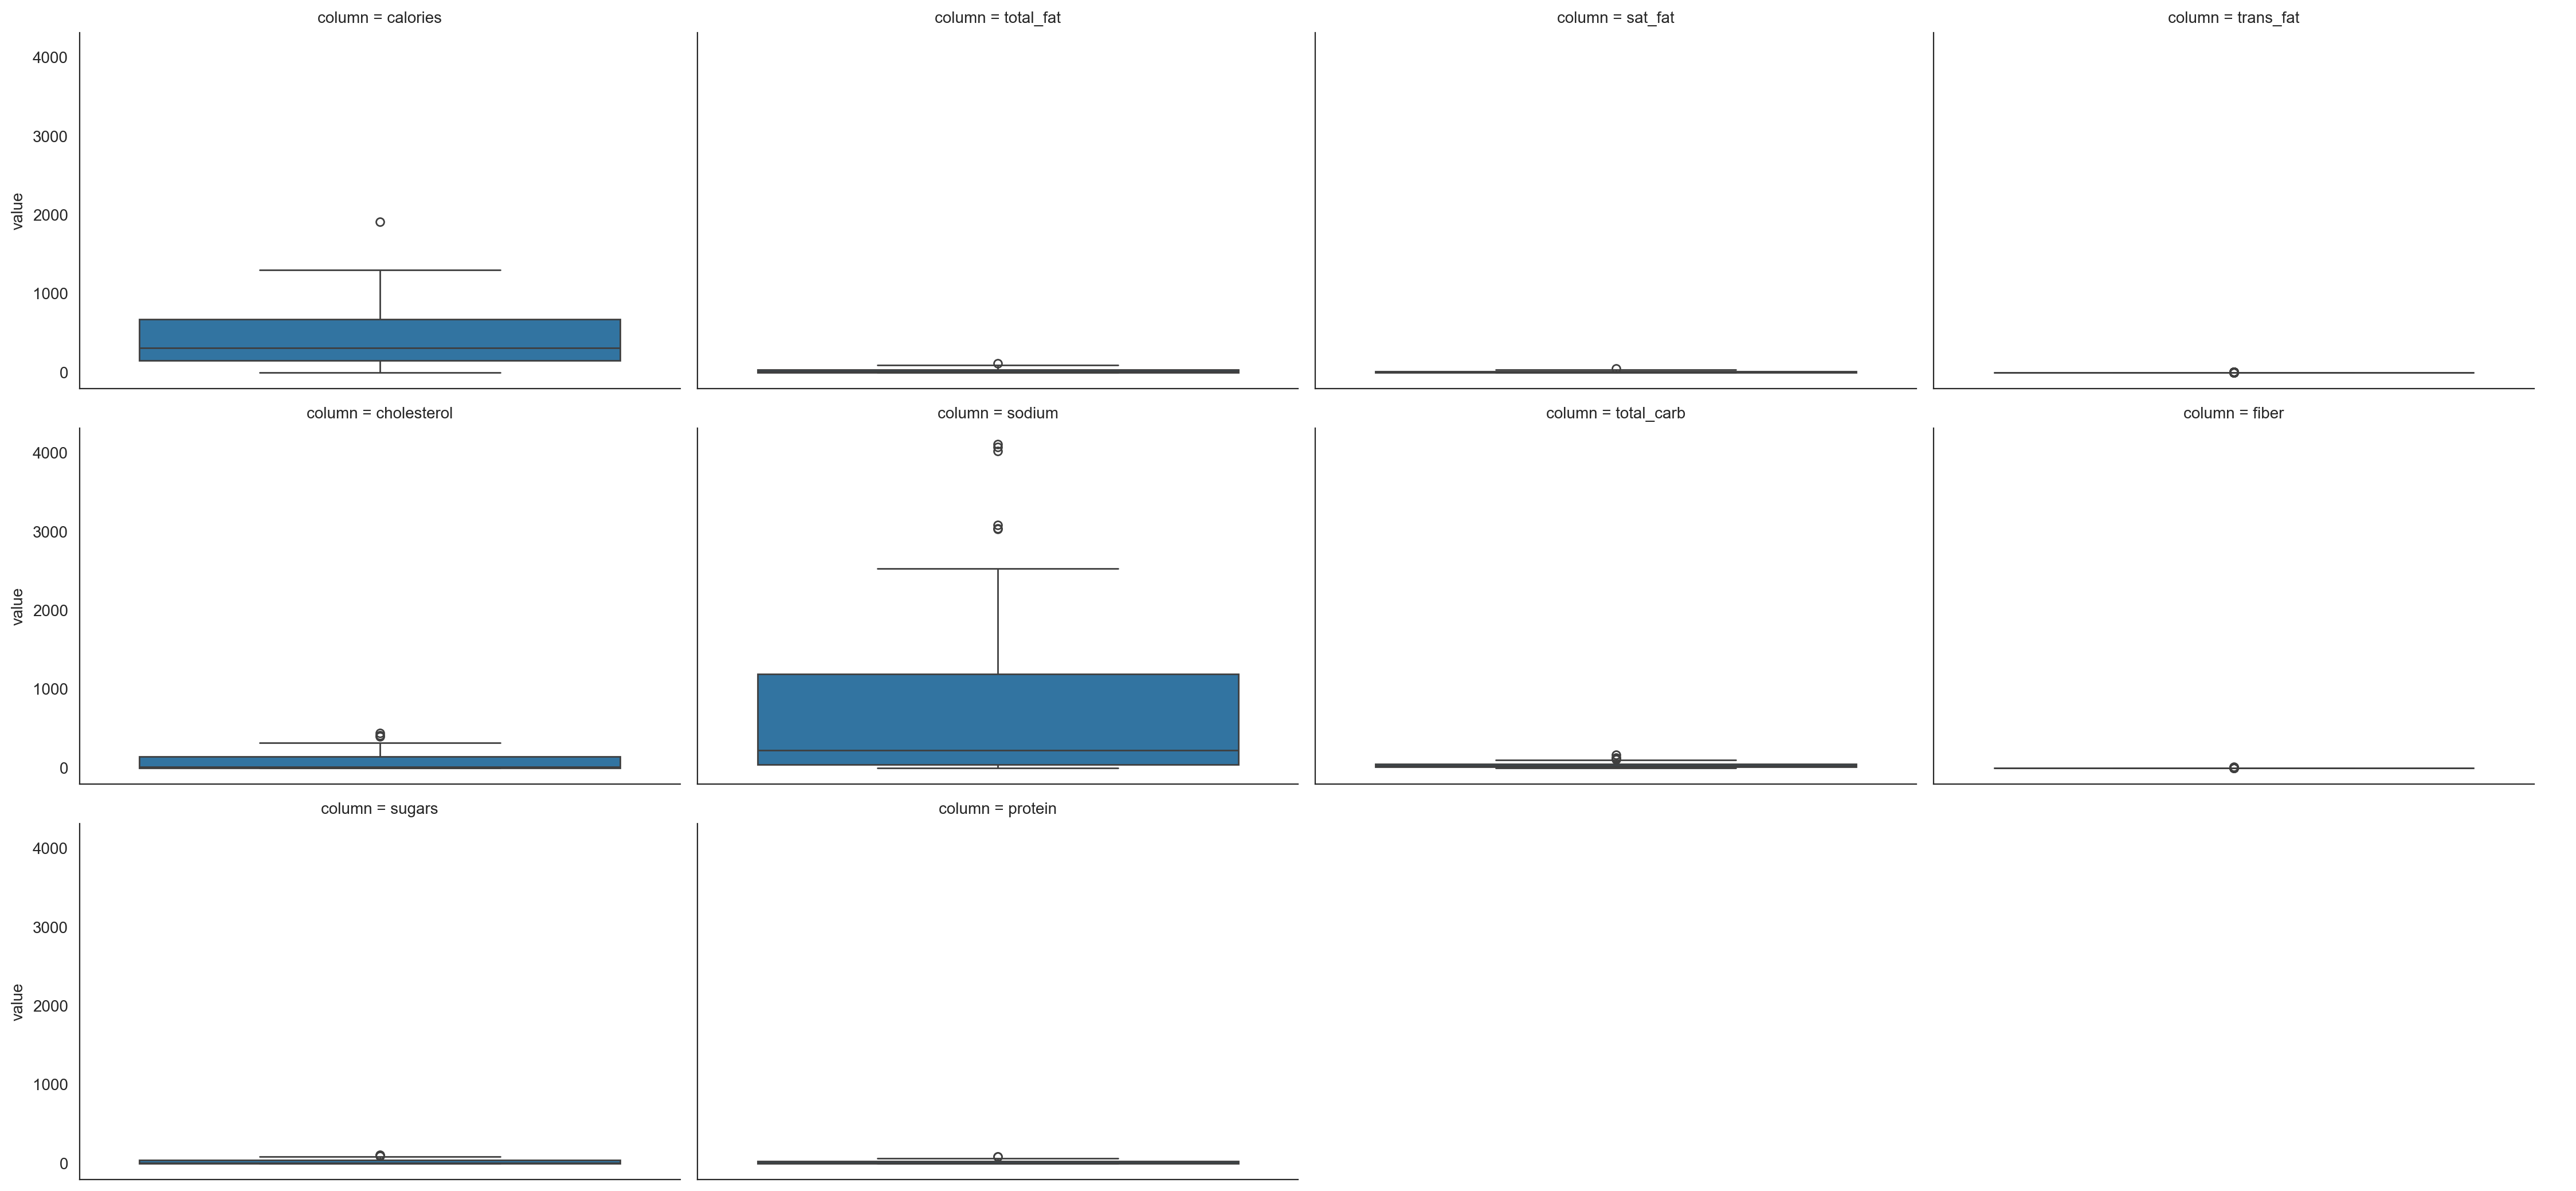

In [18]:
# create boxplots using catplot
sns.catplot(data=df_long, y='value', kind='box', col="column", col_wrap=4, aspect=1.6, height=3.5);

Some features, such as 'sodium' had outliers so I removed the outliers to help the data change to a normal distribution.

In [184]:
# check shape before drop outlier
df1.shape

(154, 10)

In [185]:
columns = ['calories', 'total_fat', 'sat_fat', 'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugars', 'protein']

for column in columns:
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3-Q1 
    
    lower_bound = Q1-1.5*IQR 
    upper_bound = Q3+1.5*IQR 
    df = df1[(df1[column] > lower_bound) & (df1[column] < upper_bound)]

In [186]:
# check shape after drop outlier
df.shape

(152, 10)

After removing outliers, there are 152 rows of data remaining.

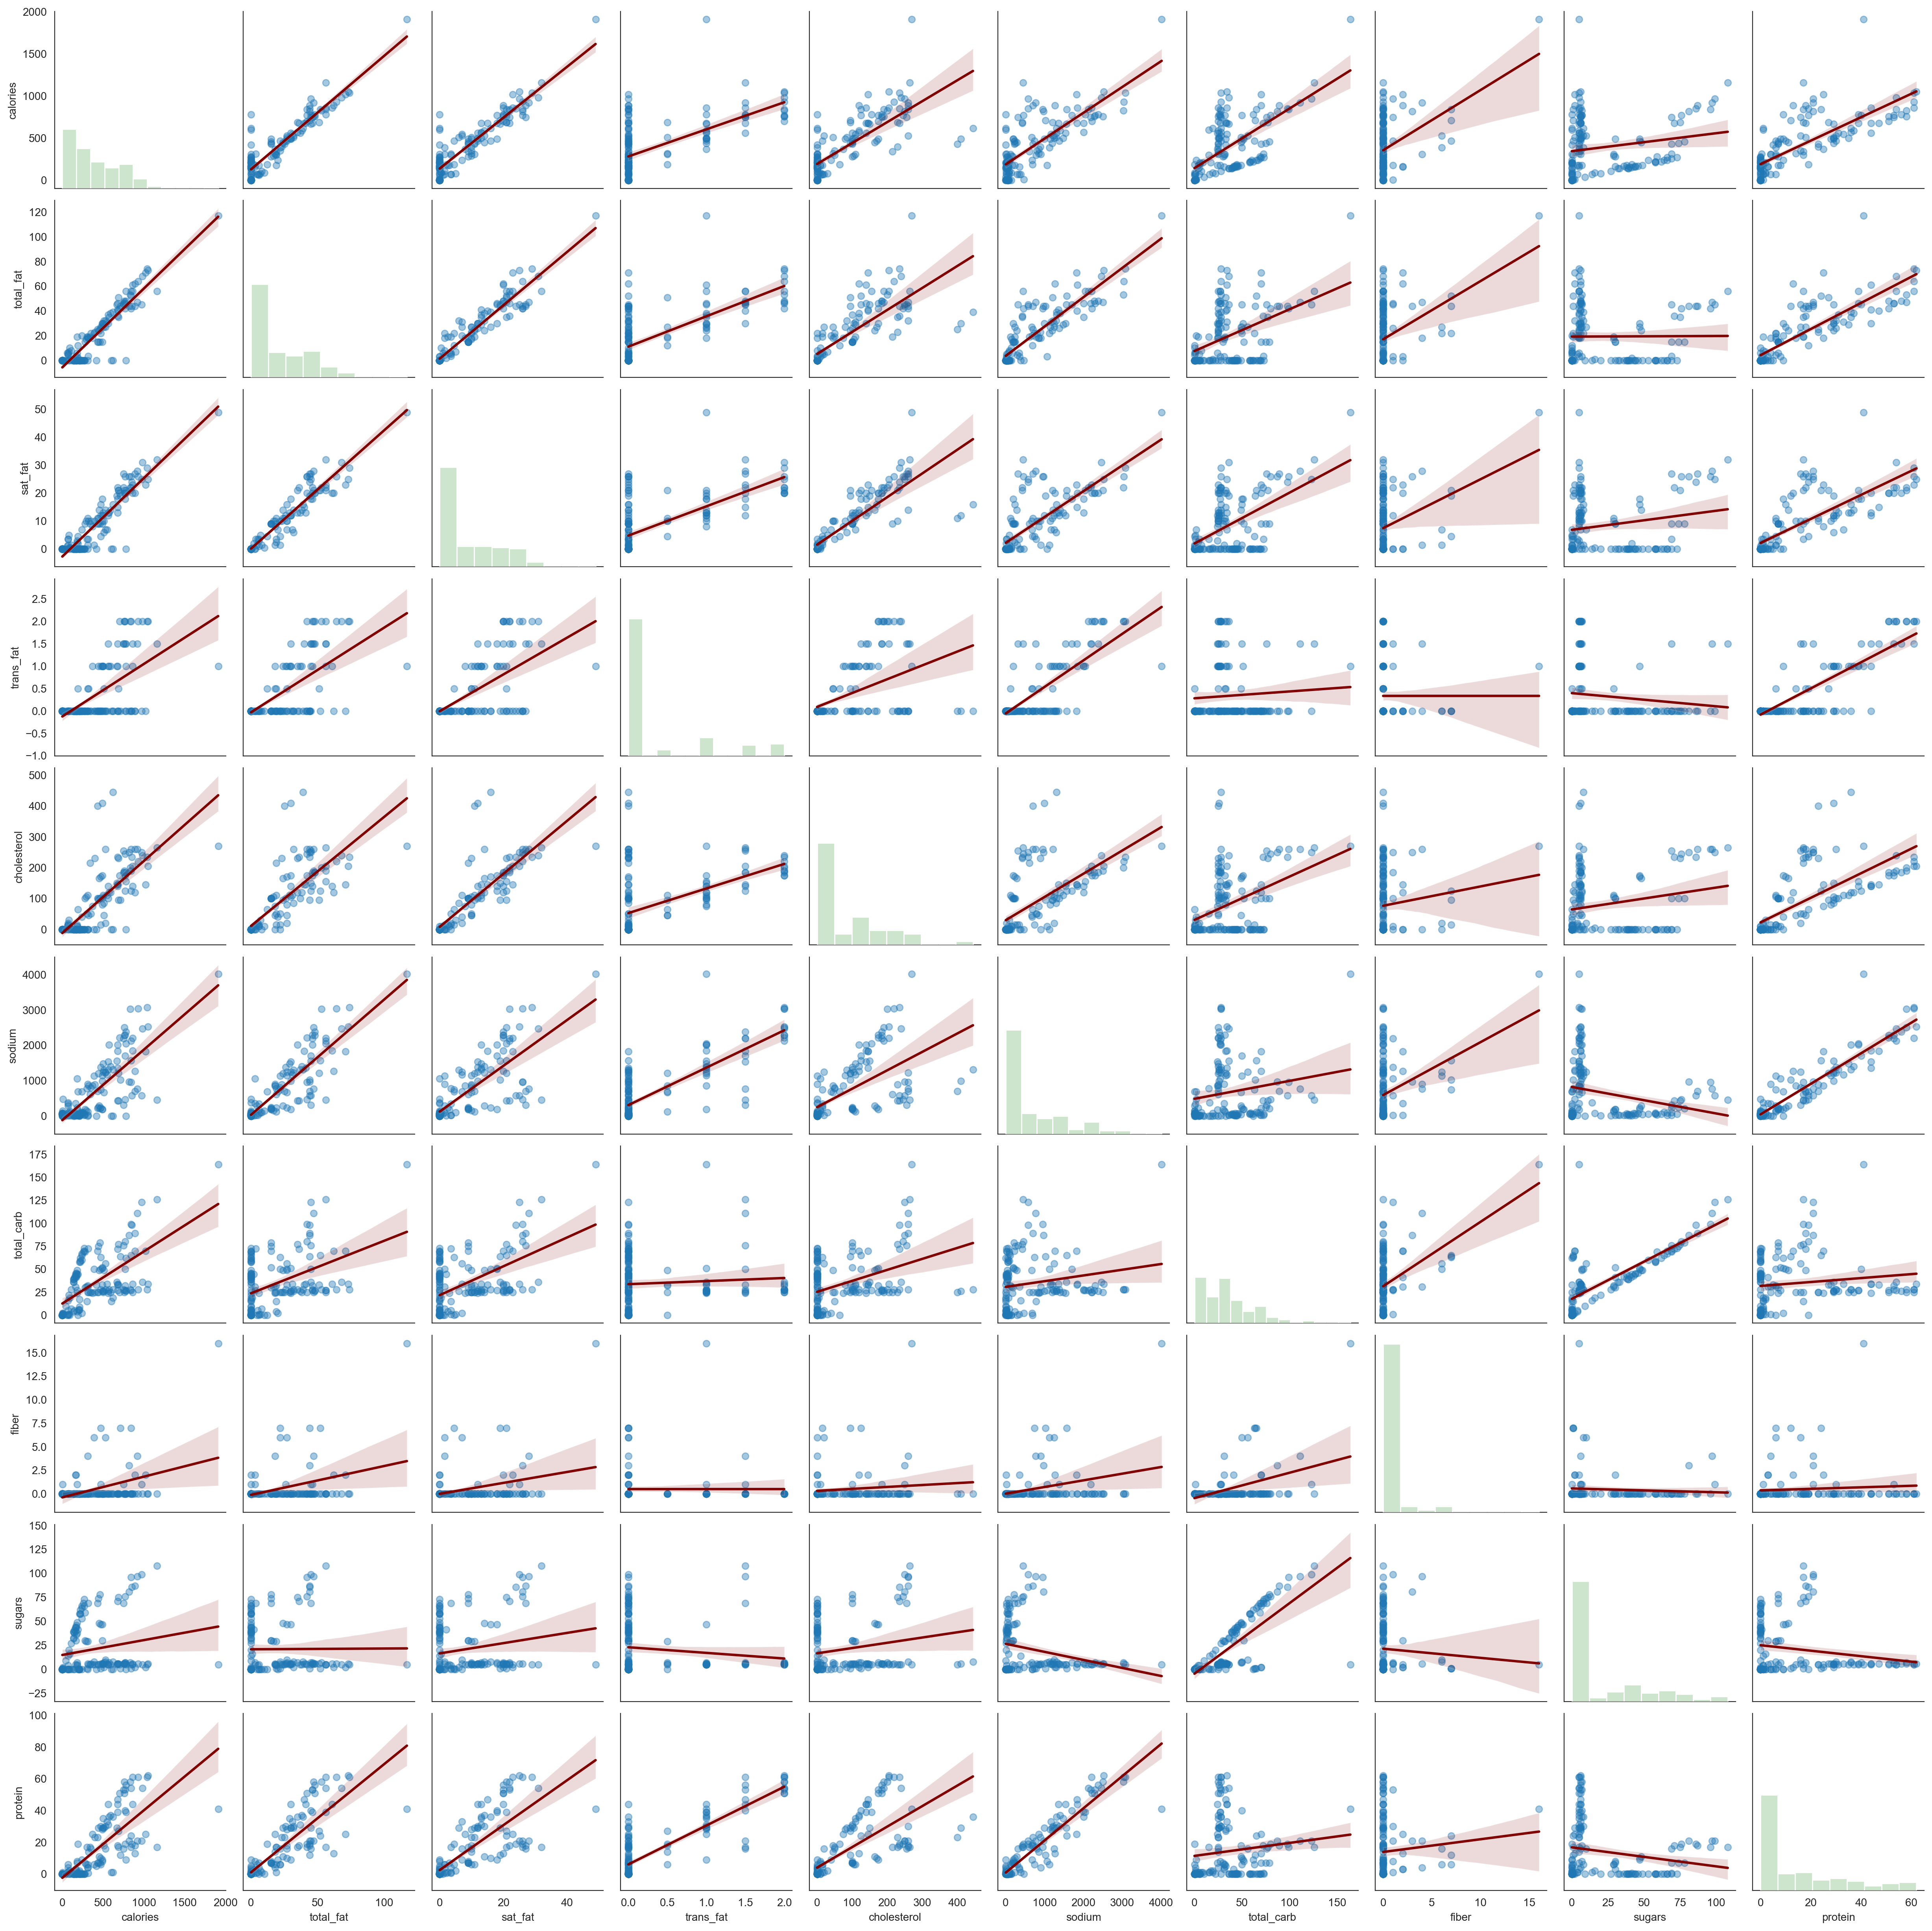

In [22]:
# after drop outlier
sns.pairplot(df, kind='reg', 
             plot_kws={'scatter_kws': {'alpha':0.4},
                       'line_kws': {'color': 'maroon'}},
             diag_kws={'color': 'green', 'alpha':0.2});

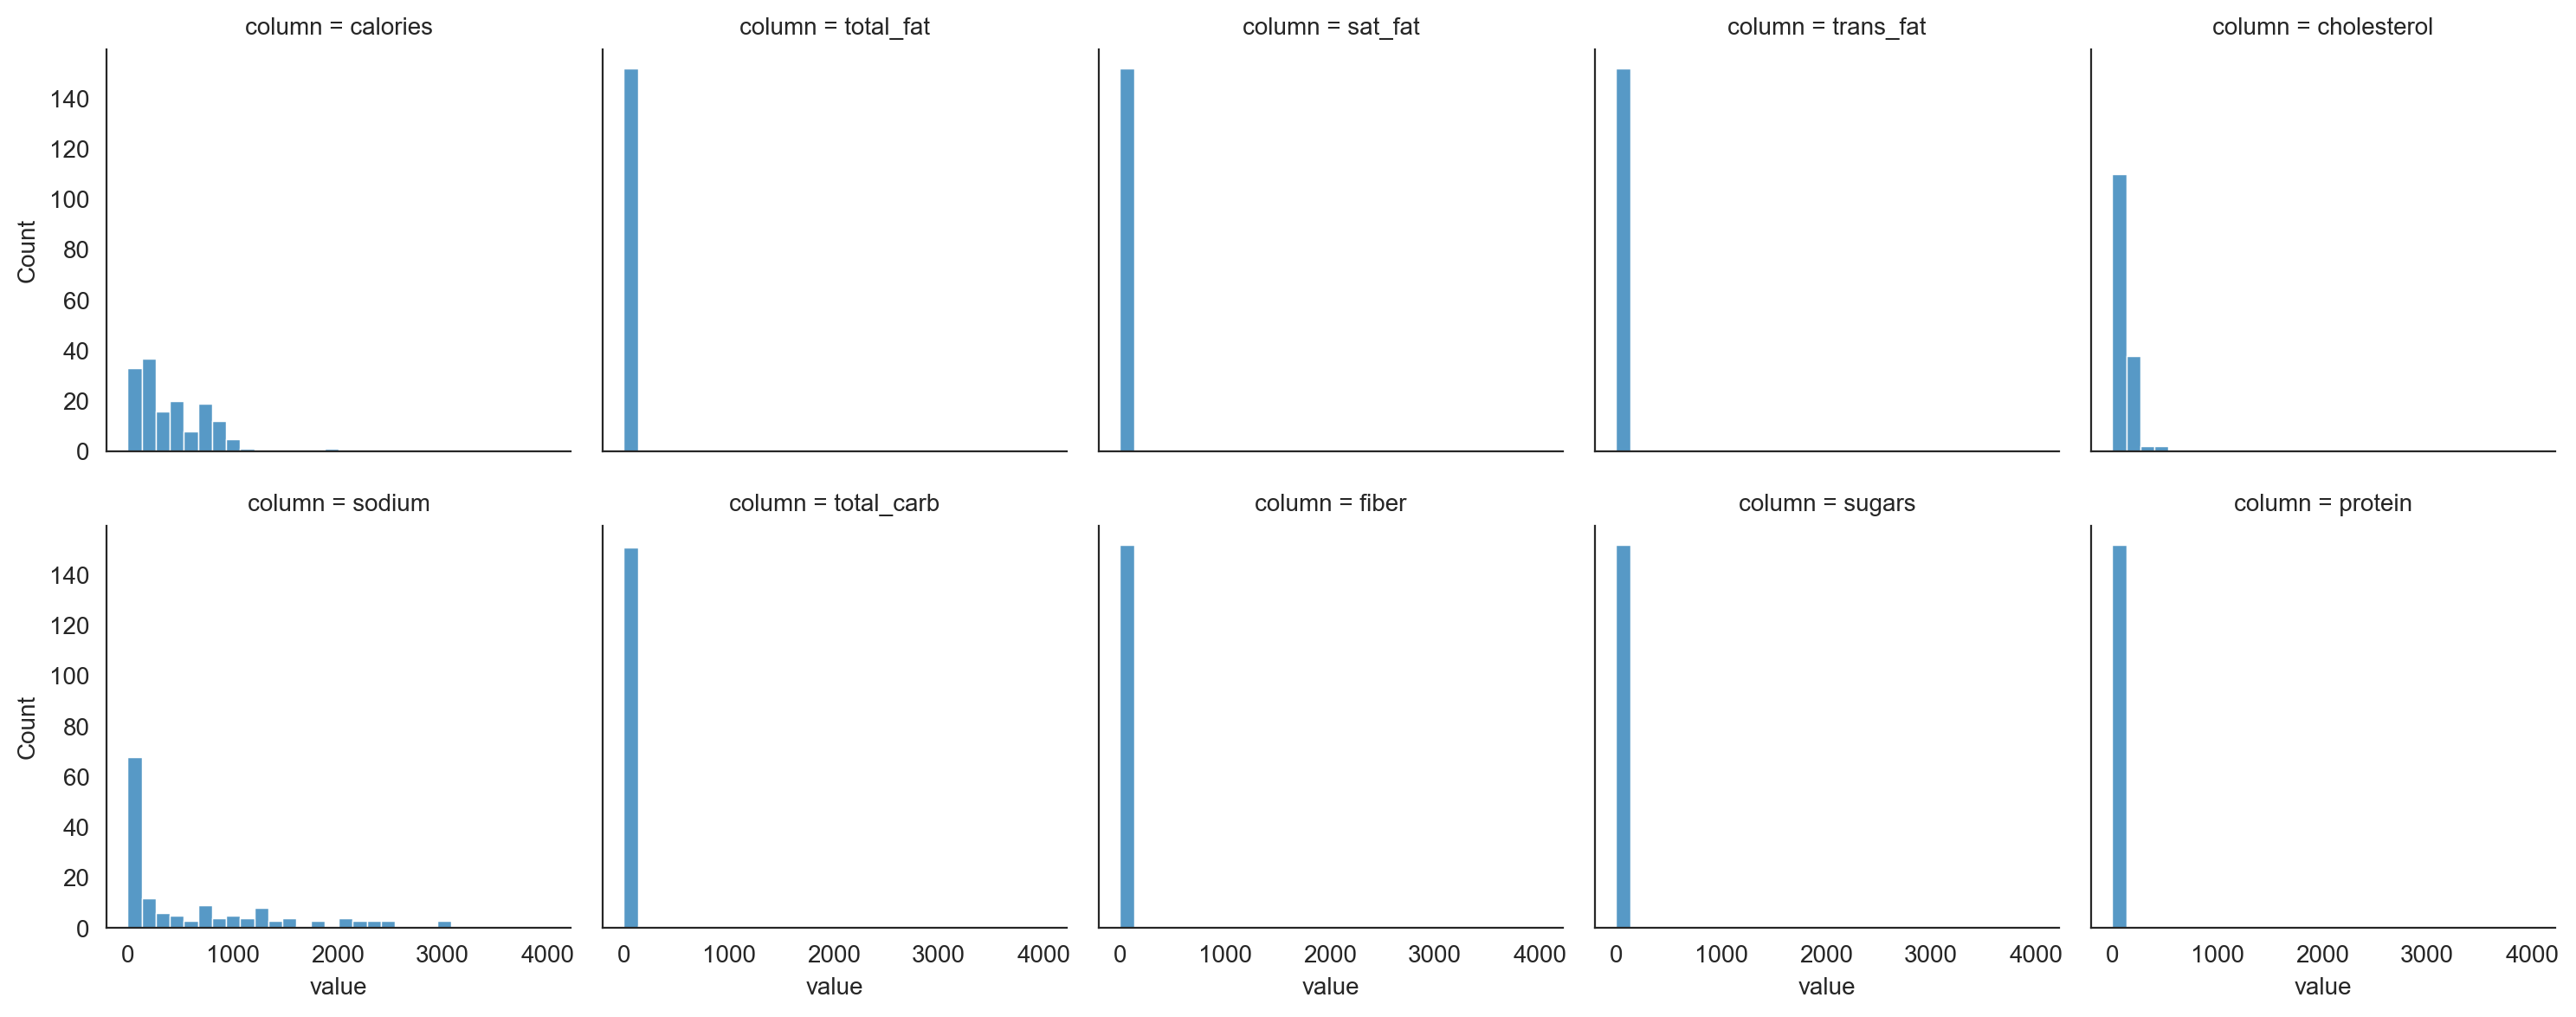

In [23]:
# create histogram using catplot after drop outlier
columns = ['calories', 'total_fat', 'sat_fat', 'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugars', 'protein']
df_long = pd.melt(df[columns], var_name='column', value_name='value')

sns.displot(data=df_long, x='value', kind='hist', col='column', col_wrap=5, aspect=1, height=3, bins=30);

# **Predictive Modeling**

In [24]:
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 1.4.0


Following are the algorithms I will use to make the model:
1) Linear Regression
2) Ridge Regression
3) Lasso regression
4) Extra Trees Regressor
5) Random Forest Regression
6) Gradient-boosted Regression
7) LightGBM Regressor
8) Catboost Regressor

Model evaluation metrics for regression type:
* Mean Absolute Error (MAE):
    * Formula: (1 / n) * Σ|actual - predicted|
* Mean Squared Error (MSE):
    * Formula: (1 / n) * Σ(actual - predicted)^2
* Root Mean Squared Error (RMSE):
    * Formula: √(MSE)
* R-squared (Coefficient of Determination):
    * Formula: 1 - (Σ(actual - predicted)^2 / Σ(actual - mean(actual))^2)

Source: 
- [regression-model](https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/)
- [classification-model](https://www.analyticsvidhya.com/blog/2020/10/how-to-choose-evaluation-metrics-for-classification-model/)

### Prepare the data by splitting it into training and testing datasets
In order to have a standard for comparison, I will use the same x_train, x_test, y_train, and y_test data for all models

In [25]:
from sklearn.model_selection import train_test_split

x = df.drop(['calories'], axis = 1)
y = df['calories']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

In [26]:
print(df.shape, x_train.shape, x_test.shape)

(152, 10) (106, 9) (46, 9)


- x contains the orignal amount of data which is 152
- x_train contains 70% of the data which is 106
- x_test contains 30% of the data which is 46

### 1. Linear Regression
$$
Y=β0+β1x1+β2x2+...+βnXn+ϵ
$$
The most basic regression formular by estimating the parameters using the least squares method (Ordinary Least Squares). 

In [27]:
from sklearn.linear_model import LinearRegression

For train data

In [28]:
# create a Linear regressor
lm = LinearRegression()

# train the model using the training datasets
lm.fit(x_train, y_train)

LinearRegression()

In [29]:
# look intercept and coefficient
print('R-squared(R^2):', lm.score(x_train, y_train).round(3))
print('Value of y intercept(α):', lm.intercept_.round(3))
print('Coefficient(β):', lm.coef_.round(2))

R-squared(R^2): 0.943
Value of y intercept(α): 39.925
Coefficient(β): [  3.14  10.91   8.58  -0.03  -0.06   8.96 -24.16  -5.84   4.9 ]


In [30]:
# Model Evaluation
# model prediction on train data
y_pred_train_lm = lm.predict(x_train)

print('R^2:', r2_score(y_train, y_pred_train_lm).round(5))
print('MAE:', mean_absolute_error(y_train, y_pred_train_lm).round(3))
print('MSE:', mean_squared_error(y_train, y_pred_train_lm).round(3))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train_lm)).round(3))

R^2: 0.94301
MAE: 48.886
MSE: 6022.037
RMSE: 77.602


R-squared of train data has an accuracy of 0.94301 so next I will use the model with test data.  

For test data

In [31]:
# predict on the testing dataset
y_pred_test_lm = lm.predict(x_test)

# evaluate errors
lm_r1 = r2_score(y_test, y_pred_test_lm).round(5)
lm_mae1 = mean_absolute_error(y_test, y_pred_test_lm).round(3)
lm_mse1 = mean_squared_error(y_test, y_pred_test_lm).round(3)
lm_rmse1 = np.sqrt(mean_squared_error(y_test, y_pred_test_lm)).round(3)
print('R^2:', lm_r1)
print('MAE:', lm_mae1)
print('MSE:', lm_mse1)
print('RMSE:', lm_rmse1)

R^2: 0.98349
MAE: 34.548
MSE: 1816.428
RMSE: 42.62


Using the model with test data, R-squared is 0.98349, which is considered a very high value.

In [32]:
# compare the actual data with the predicted data.
pd.concat([x_test.reset_index(drop=True), y_test.reset_index(drop=True), pd.Series(y_pred_test_lm, name='predicted')], axis=1).head(15)

total_fat  sat_fat  trans_fat  cholesterol  sodium  total_carb  fiber  \
0         5.0      3.5        0.0           20    20.0         5.0      0   
1         0.0      0.0        0.0            0    55.0         0.0      0   
2         0.0      0.0        0.0            0    60.0        40.0      0   
3         0.0      0.0        0.0            0   140.0         0.0      0   
4         0.0      0.0        0.0            0    12.0        41.0      2   
5        25.0     11.0        0.0          400   700.0        25.0      0   
6        48.0     20.0        2.0          185  2280.0        27.0      0   
7        71.0     23.0        0.0          145  1830.0        70.0      2   
8        40.0     15.0        1.5          145  1840.0        33.0      0   
9        15.0      9.0        0.0          100   220.0        70.0      0   
10       44.0     19.0        0.0           95  1020.0        64.0      7   
11        0.0      0.0        0.0            0    15.0        42.0      0   
12        0.0      0.0        0.0            0    15.0        36.0      0   
13        0.0      0.0        0.0            0    40.0         0.0      0   
14       29.0     13.0        1.0          110  1480.0        25.0      0   

    sugars  protein  calories    predicted  
0      4.0      1.0      70.0   118.308417  
1      0.0      0.0       0.0    36.433341  
2     38.0      0.0     150.0   172.799913  
3      0.0      0.0       1.0    31.036637  
4     30.0      3.0     165.0   197.909580  
5      5.0     23.0     430.0   489.821895  
6      6.0     51.0     760.0   732.639010  
7      2.0     25.0    1020.0  1083.292795  
8      6.0     47.0     680.0   711.991760  
9     69.0      7.0     430.0   427.182030  
10     1.0     12.0     710.0   775.350474  
11    36.0      0.0     170.0   205.264759  
12    33.0      0.0     140.0   168.995840  
13     0.0      0.0       0.0    37.385700  
14     5.0     35.0     500.0   550.561517

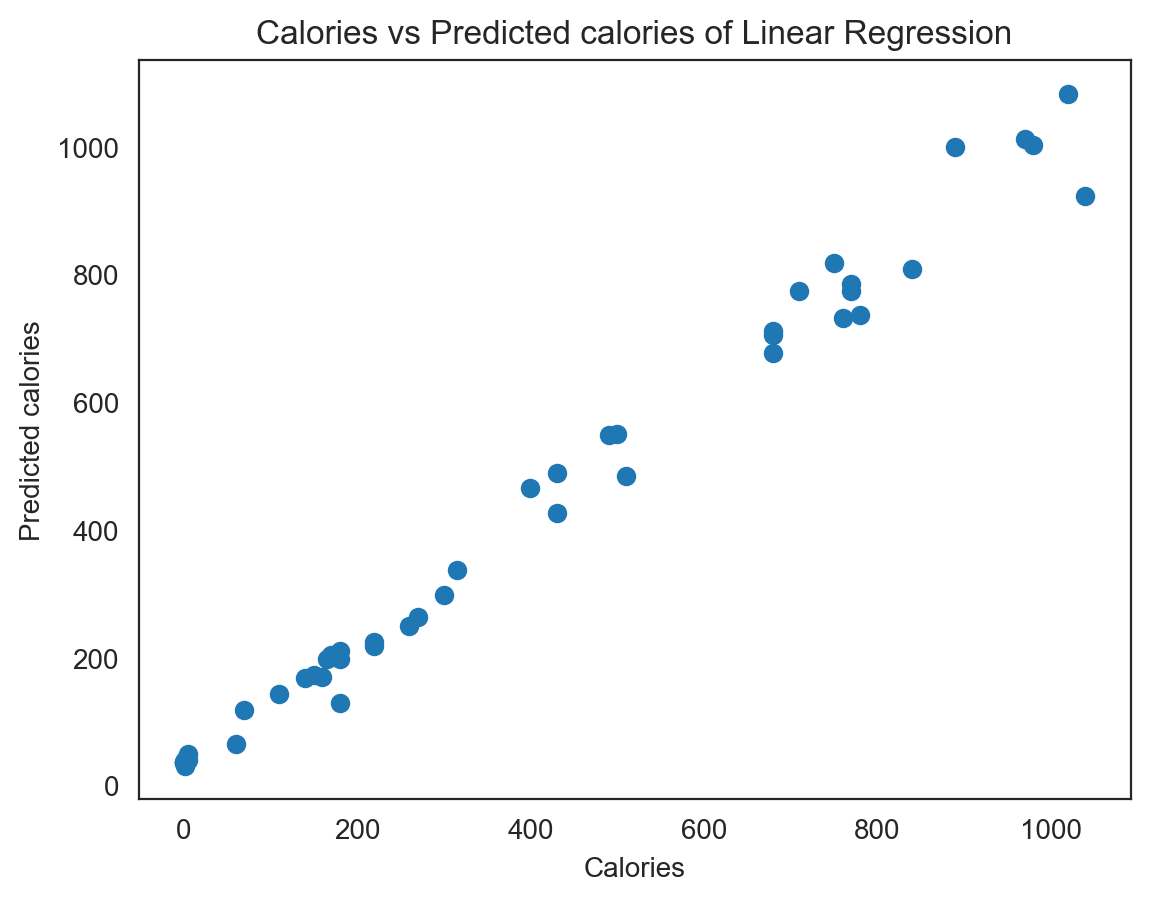

In [188]:
# compare y_test and y_predict by using scatter plot 
plt.scatter(y_test, y_pred_test_lm)
plt.xlabel('Calories')
plt.ylabel('Predicted calories')
plt.title("Calories vs Predicted calories of Linear Regression");

If the result is good, it should look diagonal, which from the scatterplot above found that the result is quite good.

### 2. Ridge Regression
The model is a regularization that adds a penalty term to the standard linear regression objective, helping to reduce overfitting by penalizing large coefficients.

In [34]:
from sklearn.linear_model import Ridge

For train data

In [35]:
# explore defaults
Ridge().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [36]:
# create Ridge model
ridge_model = Ridge() 
# fit the model
ridge_model.fit(x_train, y_train) 

Ridge()

For test data

In [37]:
# predict on the testing data
y_pred_test_rr = ridge_model.predict(x_test)

# evaluate errors
rr_r = r2_score(y_test, y_pred_test_rr).round(5)
rr_mae = mean_absolute_error(y_test, y_pred_test_rr).round(3)
rr_mse = mean_squared_error(y_test, y_pred_test_rr).round(3)
rr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_rr)).round(3)
print('R^2:', rr_r)
print('MAE:', rr_mae)
print('MSE:', rr_mse)
print('RMSE:', rr_rmse)

R^2: 0.98356
MAE: 34.484
MSE: 1808.213
RMSE: 42.523


R-squared for test data is 0.98356 which is as accurate as Linear regression.

In [38]:
# compare the actual data with the predicted data.
pd.concat([x_test.reset_index(drop=True), y_test.reset_index(drop=True), pd.Series(y_pred_test_rr, name='predicted')], axis=1).head(15)

total_fat  sat_fat  trans_fat  cholesterol  sodium  total_carb  fiber  \
0         5.0      3.5        0.0           20    20.0         5.0      0   
1         0.0      0.0        0.0            0    55.0         0.0      0   
2         0.0      0.0        0.0            0    60.0        40.0      0   
3         0.0      0.0        0.0            0   140.0         0.0      0   
4         0.0      0.0        0.0            0    12.0        41.0      2   
5        25.0     11.0        0.0          400   700.0        25.0      0   
6        48.0     20.0        2.0          185  2280.0        27.0      0   
7        71.0     23.0        0.0          145  1830.0        70.0      2   
8        40.0     15.0        1.5          145  1840.0        33.0      0   
9        15.0      9.0        0.0          100   220.0        70.0      0   
10       44.0     19.0        0.0           95  1020.0        64.0      7   
11        0.0      0.0        0.0            0    15.0        42.0      0   
12        0.0      0.0        0.0            0    15.0        36.0      0   
13        0.0      0.0        0.0            0    40.0         0.0      0   
14       29.0     13.0        1.0          110  1480.0        25.0      0   

    sugars  protein  calories    predicted  
0      4.0      1.0      70.0   118.370856  
1      0.0      0.0       0.0    36.436478  
2     38.0      0.0     150.0   172.760477  
3      0.0      0.0       1.0    30.975273  
4     30.0      3.0     165.0   198.600551  
5      5.0     23.0     430.0   489.355090  
6      6.0     51.0     760.0   732.107927  
7      2.0     25.0    1020.0  1082.446118  
8      6.0     47.0     680.0   711.971866  
9     69.0      7.0     430.0   427.357789  
10     1.0     12.0     710.0   776.079157  
11    36.0      0.0     170.0   205.171866  
12    33.0      0.0     140.0   168.968071  
13     0.0      0.0       0.0    37.400221  
14     5.0     35.0     500.0   550.679005

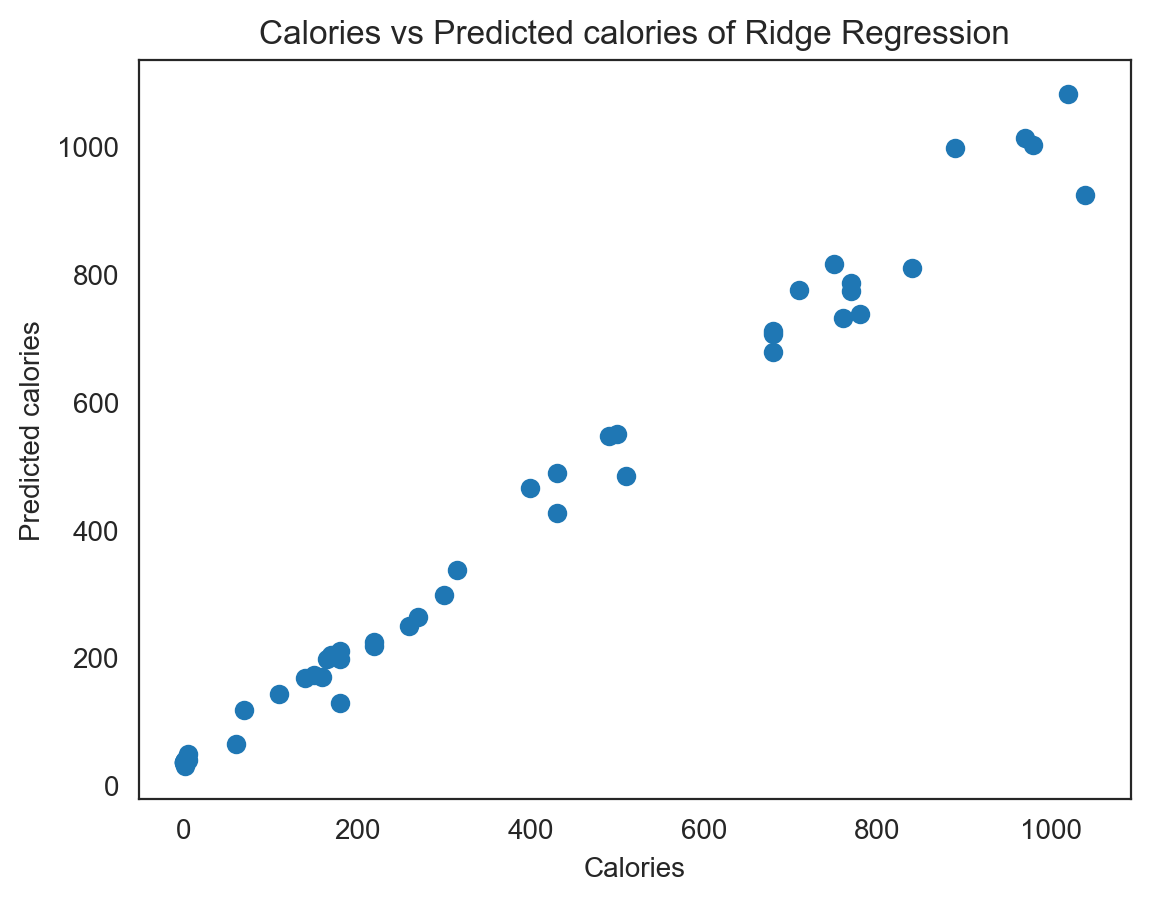

In [190]:
# compare y_test and y_predict by using scatter plot 
plt.scatter(y_test, y_pred_test_rr)
plt.xlabel('Calories')
plt.ylabel('Predicted calories')
plt.title("Calories vs Predicted calories of Ridge Regression");

### 3. Lasso Regression
Lasso regression is similar to Ridge regression but differs in that the penalty term does not use coefficient values. This model reduces non-important variables.

In [40]:
from sklearn.linear_model import Lasso

For train data

In [41]:
# explore defaults
Lasso().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [42]:
# create lasso model
lasso_model = Lasso() 
# fit the model
lasso_model.fit(x_train, y_train)

Lasso()

For test data

In [43]:
# predict on the testing data
y_pred_test_ls = lasso_model.predict(x_test)

# evaluate errors
ls_r = r2_score(y_test, y_pred_test_ls).round(5)
ls_mae = mean_absolute_error(y_test, y_pred_test_ls).round(3)
ls_mse = mean_squared_error(y_test, y_pred_test_ls).round(3)
ls_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_ls)).round(3)
print('R^2:', ls_r)
print('MAE:', ls_mae)
print('MSE:', ls_mse)
print('RMSE:', ls_rmse)

R^2: 0.98384
MAE: 34.248
MSE: 1777.325
RMSE: 42.158


In [44]:
# compare the actual data with the predicted data
pd.concat([x_test.reset_index(drop=True), y_test.reset_index(drop=True), pd.Series(y_pred_test_ls, name='predicted')], axis=1).head(15)

total_fat  sat_fat  trans_fat  cholesterol  sodium  total_carb  fiber  \
0         5.0      3.5        0.0           20    20.0         5.0      0   
1         0.0      0.0        0.0            0    55.0         0.0      0   
2         0.0      0.0        0.0            0    60.0        40.0      0   
3         0.0      0.0        0.0            0   140.0         0.0      0   
4         0.0      0.0        0.0            0    12.0        41.0      2   
5        25.0     11.0        0.0          400   700.0        25.0      0   
6        48.0     20.0        2.0          185  2280.0        27.0      0   
7        71.0     23.0        0.0          145  1830.0        70.0      2   
8        40.0     15.0        1.5          145  1840.0        33.0      0   
9        15.0      9.0        0.0          100   220.0        70.0      0   
10       44.0     19.0        0.0           95  1020.0        64.0      7   
11        0.0      0.0        0.0            0    15.0        42.0      0   
12        0.0      0.0        0.0            0    15.0        36.0      0   
13        0.0      0.0        0.0            0    40.0         0.0      0   
14       29.0     13.0        1.0          110  1480.0        25.0      0   

    sugars  protein  calories    predicted  
0      4.0      1.0      70.0   118.457987  
1      0.0      0.0       0.0    36.293489  
2     38.0      0.0     150.0   172.726729  
3      0.0      0.0       1.0    30.736451  
4     30.0      3.0     165.0   200.953087  
5      5.0     23.0     430.0   486.933951  
6      6.0     51.0     760.0   728.622598  
7      2.0     25.0    1020.0  1080.853110  
8      6.0     47.0     680.0   711.149697  
9     69.0      7.0     430.0   428.558399  
10     1.0     12.0     710.0   778.682618  
11    36.0      0.0     170.0   204.822588  
12    33.0      0.0     140.0   168.859106  
13     0.0      0.0       0.0    37.274143  
14     5.0     35.0     500.0   551.292251

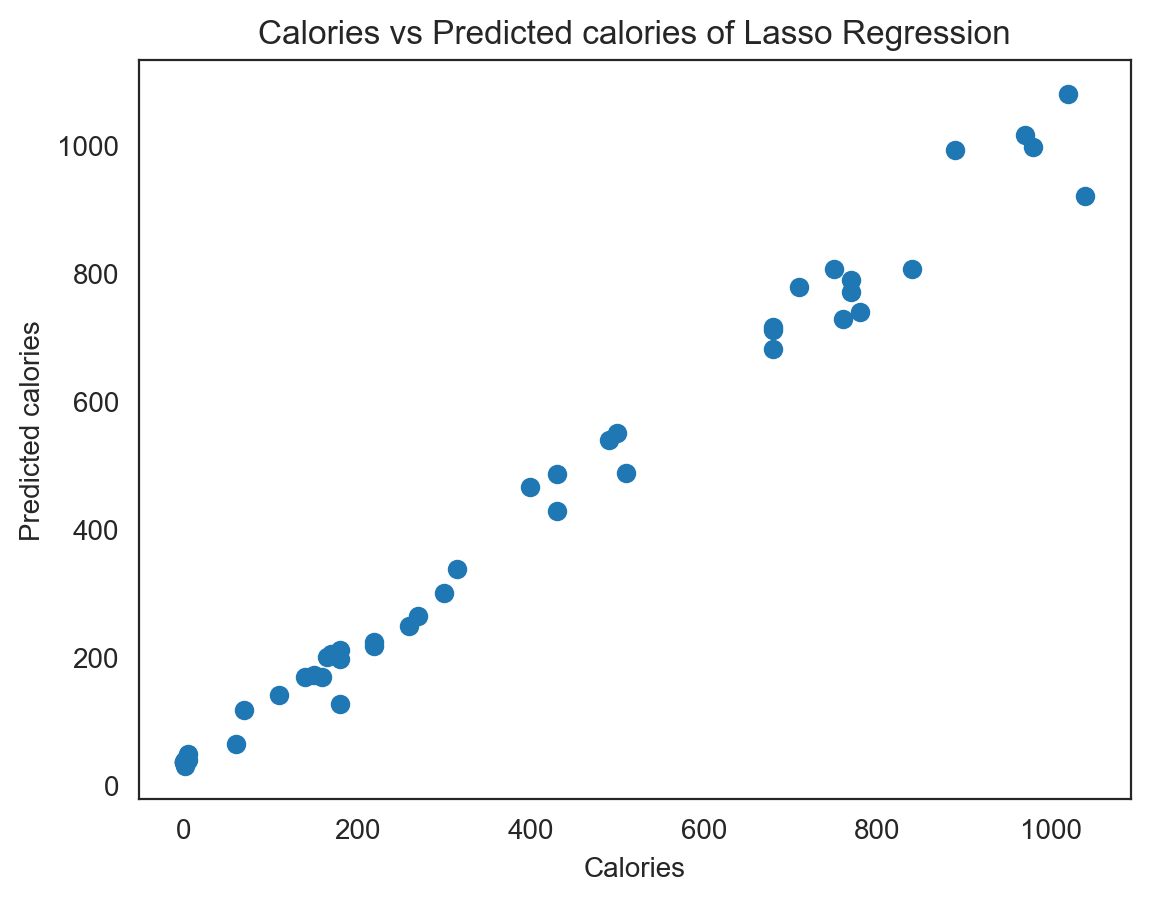

In [191]:
# compare y_test and y_predict by using scatter plot 
plt.scatter(y_test, y_pred_test_ls)
plt.xlabel('Calories')
plt.ylabel('Predicted calories')
plt.title("Calories vs Predicted calories of Lasso Regression");

#### Compare results between Ridge Regression and Lasso Regression

In [46]:
c23 = [
    {'R-squared': rr_r, 'MAE':rr_mae, 'MSE':rr_mse, 'RMSE':rr_rmse},
    {'R-squared': ls_r, 'MAE':ls_mae, 'MSE':ls_mse, 'RMSE':ls_rmse}
]
c233 = pd.DataFrame(c23).T
c233.rename(columns={0:'Ridge', 1:'Lasso'})

Ridge       Lasso
R-squared     0.98356     0.98384
MAE          34.48400    34.24800
MSE        1808.21300  1777.32500
RMSE         42.52300    42.15800

Lasso Regression has slightly better results than Ridge Regression, as seen from the difference in R-squared values ​​of 0.00028. The RMSE value of Lasso is 42.15,  while of Ridge is 42.52, almost no difference.

### 4. Extra Trees Regressor
Extra Trees Regressor implements a meta estimator that fits a number of randomized decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In [47]:
from sklearn.ensemble import ExtraTreesRegressor

For train data

In [48]:
ExtraTreesRegressor().get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [49]:
# create a Decision Tree Regressor
model_etr = ExtraTreesRegressor(random_state=5)

# train the model
model_etr.fit(x_train, y_train)

ExtraTreesRegressor(random_state=5)

For test data

In [50]:
# predict on the testing data
y_pred_test_etr = model_etr.predict(x_test)

# evaluate errors
etr_r = r2_score(y_test, y_pred_test_etr).round(5)
etr_mae = mean_absolute_error(y_test, y_pred_test_etr).round(3)
etr_mse = mean_squared_error(y_test, y_pred_test_etr).round(3)
etr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_etr)).round(3)
print('R^2:', etr_r)
print('MAE:', etr_mae)
print('MSE:', etr_mse)
print('RMSE:', etr_rmse)

R^2: 0.97943
MAE: 30.804
MSE: 2262.694
RMSE: 47.568


In [51]:
# compare the actual data with the predicted data.
pd.concat([x_test.reset_index(drop=True), y_test.reset_index(drop=True), pd.Series(y_pred_test_etr, name='predicted')], axis=1).head(15)

total_fat  sat_fat  trans_fat  cholesterol  sodium  total_carb  fiber  \
0         5.0      3.5        0.0           20    20.0         5.0      0   
1         0.0      0.0        0.0            0    55.0         0.0      0   
2         0.0      0.0        0.0            0    60.0        40.0      0   
3         0.0      0.0        0.0            0   140.0         0.0      0   
4         0.0      0.0        0.0            0    12.0        41.0      2   
5        25.0     11.0        0.0          400   700.0        25.0      0   
6        48.0     20.0        2.0          185  2280.0        27.0      0   
7        71.0     23.0        0.0          145  1830.0        70.0      2   
8        40.0     15.0        1.5          145  1840.0        33.0      0   
9        15.0      9.0        0.0          100   220.0        70.0      0   
10       44.0     19.0        0.0           95  1020.0        64.0      7   
11        0.0      0.0        0.0            0    15.0        42.0      0   
12        0.0      0.0        0.0            0    15.0        36.0      0   
13        0.0      0.0        0.0            0    40.0         0.0      0   
14       29.0     13.0        1.0          110  1480.0        25.0      0   

    sugars  protein  calories  predicted  
0      4.0      1.0      70.0     146.95  
1      0.0      0.0       0.0       0.00  
2     38.0      0.0     150.0     143.60  
3      0.0      0.0       1.0       3.40  
4     30.0      3.0     165.0     178.80  
5      5.0     23.0     430.0     431.40  
6      6.0     51.0     760.0     739.80  
7      2.0     25.0    1020.0     896.40  
8      6.0     47.0     680.0     632.60  
9     69.0      7.0     430.0     446.10  
10     1.0     12.0     710.0     714.80  
11    36.0      0.0     170.0     149.40  
12    33.0      0.0     140.0     137.90  
13     0.0      0.0       0.0       0.00  
14     5.0     35.0     500.0     523.90

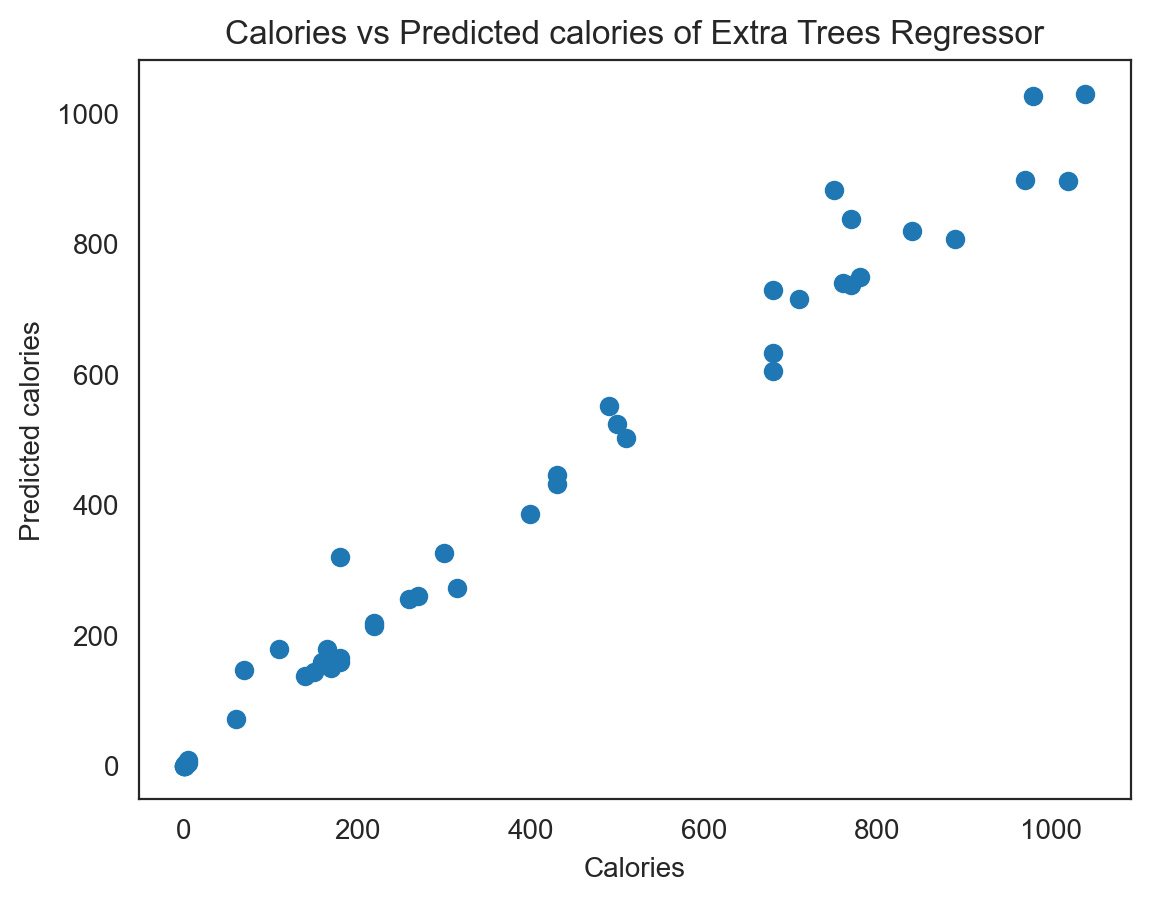

In [192]:
# compare y_test and y_predict by using scatter plot 
plt.scatter(y_test, y_pred_test_etr)
plt.xlabel('Calories')
plt.ylabel('Predicted calories')
plt.title("Calories vs Predicted calories of Extra Trees Regressor");

### 5. Random Forest Regressor
It is a model that brings many Decision Trees to train together, where each tree receives features and data as a subset of all features and data randomly. When doing prediction, let each Decision Tree make its own prediction and select the final result that received the most votes. Random Forest Regressor is a more stable model than Decision Tree.

In [230]:
from sklearn.ensemble import RandomForestRegressor

For train data

In [231]:
# explore defaults
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [232]:
# create Random Forest Regressor()
model_rfr = RandomForestRegressor(random_state=5)

In [233]:
# fit the model to the training data
model_rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=5)

For test data

In [234]:
# predict on the testing data
y_pred_test_rfr = model_rfr.predict(x_test)

# evaluate errors
rfr_r = r2_score(y_test, y_pred_test_rfr).round(5)
rfr_mae = mean_absolute_error(y_test, y_pred_test_rfr).round(3)
rfr_mse = mean_squared_error(y_test, y_pred_test_rfr).round(3)
rfr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_rfr)).round(3)
print('R^2:', rfr_r)
print('MAE:', rfr_mae)
print('MSE:', rfr_mse)
print('RMSE:', rfr_rmse)

R^2: 0.97256
MAE: 36.39
MSE: 3018.284
RMSE: 54.939


In [144]:
# compare the actual data with the predicted data.
pd.concat([x_test.reset_index(drop=True), y_test.reset_index(drop=True), pd.Series(y_pred_test_rfr, name='predicted')], axis=1).head(15)

total_fat  sat_fat  trans_fat  cholesterol  sodium  total_carb  fiber  \
0         5.0      3.5        0.0           20    20.0         5.0      0   
1         0.0      0.0        0.0            0    55.0         0.0      0   
2         0.0      0.0        0.0            0    60.0        40.0      0   
3         0.0      0.0        0.0            0   140.0         0.0      0   
4         0.0      0.0        0.0            0    12.0        41.0      2   
5        25.0     11.0        0.0          400   700.0        25.0      0   
6        48.0     20.0        2.0          185  2280.0        27.0      0   
7        71.0     23.0        0.0          145  1830.0        70.0      2   
8        40.0     15.0        1.5          145  1840.0        33.0      0   
9        15.0      9.0        0.0          100   220.0        70.0      0   
10       44.0     19.0        0.0           95  1020.0        64.0      7   
11        0.0      0.0        0.0            0    15.0        42.0      0   
12        0.0      0.0        0.0            0    15.0        36.0      0   
13        0.0      0.0        0.0            0    40.0         0.0      0   
14       29.0     13.0        1.0          110  1480.0        25.0      0   

    sugars  protein  calories  predicted  
0      4.0      1.0      70.0      169.6  
1      0.0      0.0       0.0        0.0  
2     38.0      0.0     150.0      142.8  
3      0.0      0.0       1.0        6.8  
4     30.0      3.0     165.0      217.7  
5      5.0     23.0     430.0      415.3  
6      6.0     51.0     760.0      748.7  
7      2.0     25.0    1020.0      887.6  
8      6.0     47.0     680.0      614.6  
9     69.0      7.0     430.0      437.8  
10     1.0     12.0     710.0      712.1  
11    36.0      0.0     170.0      147.8  
12    33.0      0.0     140.0      136.0  
13     0.0      0.0       0.0        0.0  
14     5.0     35.0     500.0      541.4

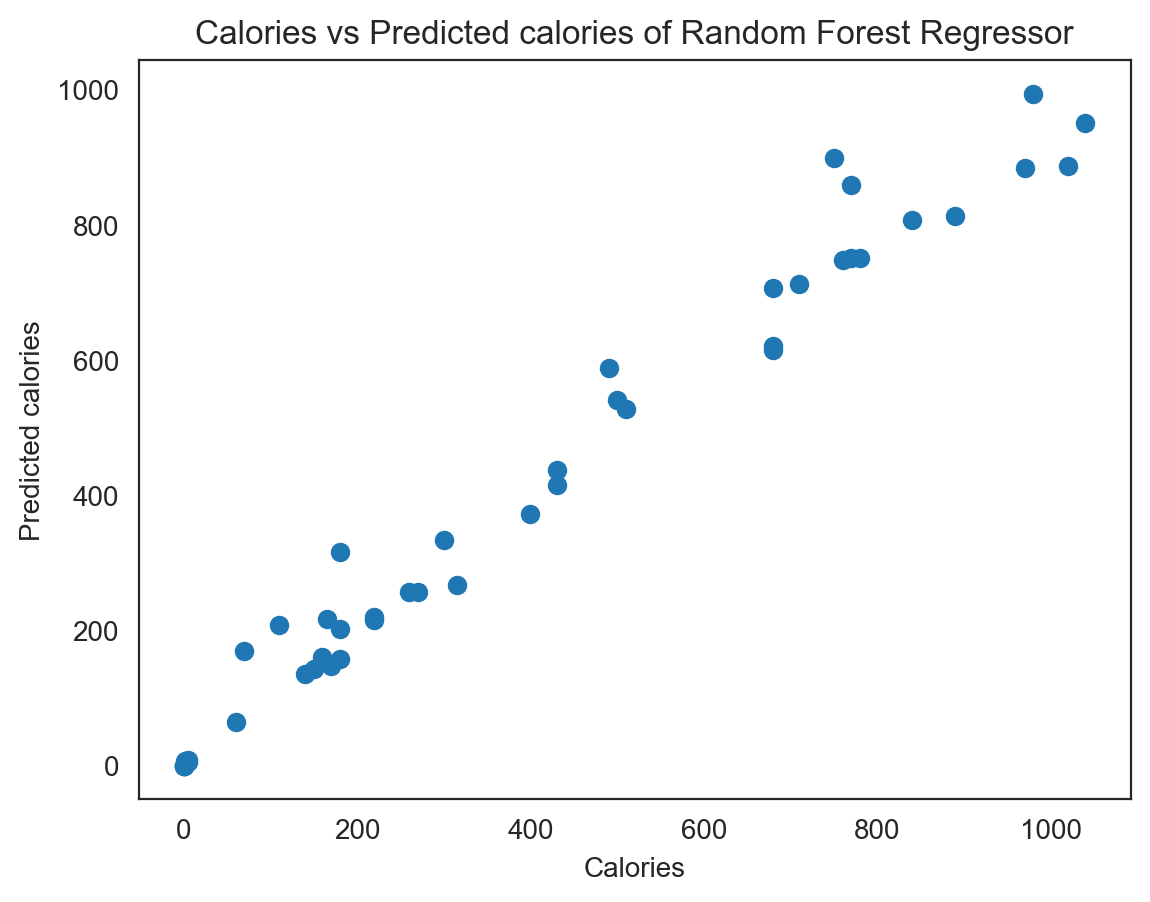

In [193]:
# compare y_test and y_predict by using scatter plot 
plt.scatter(y_test, y_pred_test_rfr)
plt.xlabel('Calories')
plt.ylabel('Predicted calories')
plt.title("Calories vs Predicted calories of Random Forest Regressor");

### 6. Gradient Boosting Regressor
Gradient Boosted Regression sequentially improves predictions by training each tree to correct the errors from the previous tree. It is one of the models that is known for its high accuracy.

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

For train data

In [61]:
# explore defaults
GradientBoostingRegressor().get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [62]:
# create Gradient Boosting Regressor
model_gb = GradientBoostingRegressor(random_state=5)

In [63]:
# fit the model to the training data
model_gb.fit(x_train, y_train)

GradientBoostingRegressor(random_state=5)

For test data

In [64]:
# predict on the testing data
y_pred_test_gb= model_gb.predict(x_test)

# evaluate errors
gb_r = r2_score(y_test, y_pred_test_gb).round(5)
gb_mae = mean_absolute_error(y_test, y_pred_test_gb).round(3)
gb_mse = mean_squared_error(y_test, y_pred_test_gb).round(3)
gb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_gb)).round(3)
print('R^2:', gb_r)
print('MAE:', gb_mae)
print('MSE:', gb_mse)
print('RMSE:', gb_rmse)

R^2: 0.97742
MAE: 32.338
MSE: 2484.007
RMSE: 49.84


In [65]:
# compare the actual data with the predicted data.
pd.concat([x_test.reset_index(drop=True), y_test.reset_index(drop=True), pd.Series(y_pred_test_gb, name='predicted')], axis=1).head(15)

total_fat  sat_fat  trans_fat  cholesterol  sodium  total_carb  fiber  \
0         5.0      3.5        0.0           20    20.0         5.0      0   
1         0.0      0.0        0.0            0    55.0         0.0      0   
2         0.0      0.0        0.0            0    60.0        40.0      0   
3         0.0      0.0        0.0            0   140.0         0.0      0   
4         0.0      0.0        0.0            0    12.0        41.0      2   
5        25.0     11.0        0.0          400   700.0        25.0      0   
6        48.0     20.0        2.0          185  2280.0        27.0      0   
7        71.0     23.0        0.0          145  1830.0        70.0      2   
8        40.0     15.0        1.5          145  1840.0        33.0      0   
9        15.0      9.0        0.0          100   220.0        70.0      0   
10       44.0     19.0        0.0           95  1020.0        64.0      7   
11        0.0      0.0        0.0            0    15.0        42.0      0   
12        0.0      0.0        0.0            0    15.0        36.0      0   
13        0.0      0.0        0.0            0    40.0         0.0      0   
14       29.0     13.0        1.0          110  1480.0        25.0      0   

    sugars  protein  calories   predicted  
0      4.0      1.0      70.0  177.442712  
1      0.0      0.0       0.0    4.410161  
2     38.0      0.0     150.0  140.853112  
3      0.0      0.0       1.0    8.122957  
4     30.0      3.0     165.0  190.207618  
5      5.0     23.0     430.0  404.953401  
6      6.0     51.0     760.0  743.569046  
7      2.0     25.0    1020.0  991.478048  
8      6.0     47.0     680.0  628.999344  
9     69.0      7.0     430.0  441.011625  
10     1.0     12.0     710.0  756.743761  
11    36.0      0.0     170.0  151.846049  
12    33.0      0.0     140.0  145.205831  
13     0.0      0.0       0.0    4.410161  
14     5.0     35.0     500.0  522.321129

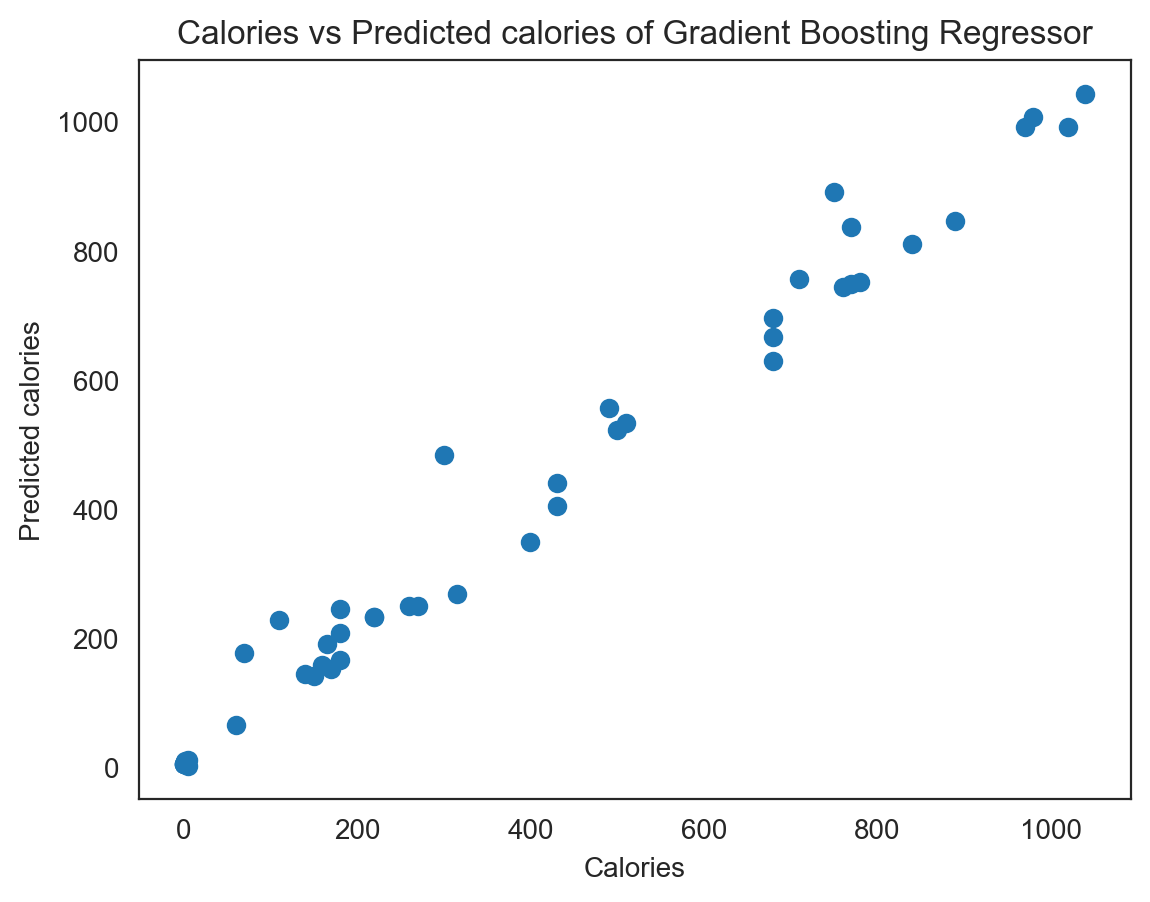

In [194]:
# compare y_test and y_predict by using scatter plot 
plt.scatter(y_test, y_pred_test_gb)
plt.xlabel('Calories')
plt.ylabel('Predicted calories')
plt.title("Calories vs Predicted calories of Gradient Boosting Regressor");

## 7. LightGBM Regressor
LightGBM is efficiently constructing decision trees by grouping and splitting data based on feature values, utilizing a leaf-wise tree growth strategy, and leveraging ensemble learning techniques.

In [67]:
from lightgbm import LGBMRegressor

For train data

In [68]:
# explore defaults
LGBMRegressor().get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [69]:
# create Gradient Boosting Regressor
model_lgbm = LGBMRegressor(force_col_wise=True, verbose = -1)

In [70]:
# fit the model to the training data
model_lgbm.fit(x_train, y_train)

LGBMRegressor(force_col_wise=True, verbose=-1)

For test data

In [71]:
# predict on the testing data
y_pred_test_lgbm= model_lgbm.predict(x_test)

# evaluate errors
lgbm_r = r2_score(y_test, y_pred_test_lgbm).round(5)
lgbm_mae = mean_absolute_error(y_test, y_pred_test_lgbm).round(3)
lgbm_mse = mean_squared_error(y_test, y_pred_test_lgbm).round(3)
lgbm_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_lgbm)).round(3)
print('R^2:', lgbm_r)
print('MAE:', lgbm_mae)
print('MSE:', lgbm_mse)
print('RMSE:', lgbm_rmse)

R^2: 0.93603
MAE: 63.411
MSE: 7037.95
RMSE: 83.892


In [72]:
# compare the actual data with the predicted data.
pd.concat([x_test.reset_index(drop=True), y_test.reset_index(drop=True), pd.Series(y_pred_test_lgbm, name='predicted')], axis=1).head(15)

total_fat  sat_fat  trans_fat  cholesterol  sodium  total_carb  fiber  \
0         5.0      3.5        0.0           20    20.0         5.0      0   
1         0.0      0.0        0.0            0    55.0         0.0      0   
2         0.0      0.0        0.0            0    60.0        40.0      0   
3         0.0      0.0        0.0            0   140.0         0.0      0   
4         0.0      0.0        0.0            0    12.0        41.0      2   
5        25.0     11.0        0.0          400   700.0        25.0      0   
6        48.0     20.0        2.0          185  2280.0        27.0      0   
7        71.0     23.0        0.0          145  1830.0        70.0      2   
8        40.0     15.0        1.5          145  1840.0        33.0      0   
9        15.0      9.0        0.0          100   220.0        70.0      0   
10       44.0     19.0        0.0           95  1020.0        64.0      7   
11        0.0      0.0        0.0            0    15.0        42.0      0   
12        0.0      0.0        0.0            0    15.0        36.0      0   
13        0.0      0.0        0.0            0    40.0         0.0      0   
14       29.0     13.0        1.0          110  1480.0        25.0      0   

    sugars  protein  calories   predicted  
0      4.0      1.0      70.0   10.894895  
1      0.0      0.0       0.0   22.684836  
2     38.0      0.0     150.0  113.097912  
3      0.0      0.0       1.0   22.684836  
4     30.0      3.0     165.0  242.007368  
5      5.0     23.0     430.0  411.348981  
6      6.0     51.0     760.0  855.955581  
7      2.0     25.0    1020.0  915.934369  
8      6.0     47.0     680.0  607.265656  
9     69.0      7.0     430.0  437.786054  
10     1.0     12.0     710.0  924.452223  
11    36.0      0.0     170.0  169.204882  
12    33.0      0.0     140.0  169.204882  
13     0.0      0.0       0.0   22.684836  
14     5.0     35.0     500.0  523.235486

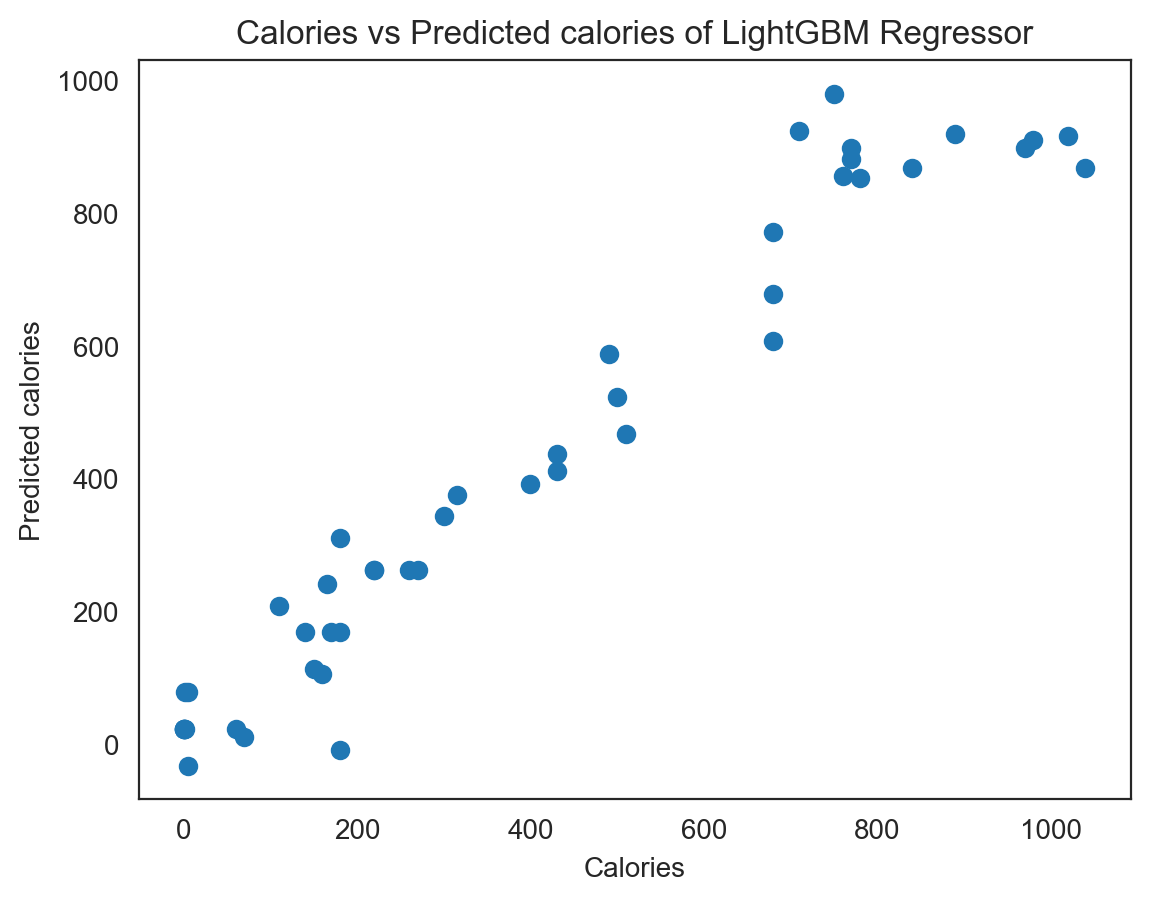

In [195]:
# compare y_test and y_predict by using scatter plot 
plt.scatter(y_test, y_pred_test_lgbm)
plt.xlabel('Calories')
plt.ylabel('Predicted calories')
plt.title("Calories vs Predicted calories of LightGBM Regressor");

## 8. CatBoost Regressor
CatBoost Regressor is the model accurately predicting complex data patterns. It addresses overfitting, automatically tunes model parameters, and handles missing values. The result is high-quality model performance.

In [235]:
from catboost import CatBoostRegressor

For train data

In [236]:
# explore defaults
CatBoostRegressor().get_params()

{'loss_function': 'RMSE'}

In [237]:
# create CatBoost Regressor
model_cb = CatBoostRegressor(verbose=0)

In [238]:
# fit the model to the training data
model_cb.fit(x_train, y_train, verbose=False)

For test data

In [204]:
# predict on the testing data
y_pred_test_cb= model_cb.predict(x_test)

# evaluate errors
cb_r = r2_score(y_test, y_pred_test_cb).round(5)
cb_mae = mean_absolute_error(y_test, y_pred_test_cb).round(3)
cb_mse = mean_squared_error(y_test, y_pred_test_cb).round(3)
cb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_cb)).round(3)
print('R^2:', cb_r)
print('MAE:', cb_mae)
print('MSE:', cb_mse)
print('RMSE:', cb_rmse)

R^2: 0.98617
MAE: 28.483
MSE: 1521.832
RMSE: 39.011


In [205]:
# compare the actual data with the predicted data.
pd.concat([x_test.reset_index(drop=True), y_test.reset_index(drop=True), pd.Series(y_pred_test_cb, name='predicted')], axis=1).head(15)

total_fat  sat_fat  trans_fat  cholesterol  sodium  total_carb  fiber  \
0         5.0      3.5        0.0           20    20.0         5.0      0   
1         0.0      0.0        0.0            0    55.0         0.0      0   
2         0.0      0.0        0.0            0    60.0        40.0      0   
3         0.0      0.0        0.0            0   140.0         0.0      0   
4         0.0      0.0        0.0            0    12.0        41.0      2   
5        25.0     11.0        0.0          400   700.0        25.0      0   
6        48.0     20.0        2.0          185  2280.0        27.0      0   
7        71.0     23.0        0.0          145  1830.0        70.0      2   
8        40.0     15.0        1.5          145  1840.0        33.0      0   
9        15.0      9.0        0.0          100   220.0        70.0      0   
10       44.0     19.0        0.0           95  1020.0        64.0      7   
11        0.0      0.0        0.0            0    15.0        42.0      0   
12        0.0      0.0        0.0            0    15.0        36.0      0   
13        0.0      0.0        0.0            0    40.0         0.0      0   
14       29.0     13.0        1.0          110  1480.0        25.0      0   

    sugars  protein  calories   predicted  
0      4.0      1.0      70.0  146.010611  
1      0.0      0.0       0.0    1.243992  
2     38.0      0.0     150.0  138.028355  
3      0.0      0.0       1.0    3.482943  
4     30.0      3.0     165.0  227.429073  
5      5.0     23.0     430.0  425.227605  
6      6.0     51.0     760.0  741.981462  
7      2.0     25.0    1020.0  932.141673  
8      6.0     47.0     680.0  669.939499  
9     69.0      7.0     430.0  444.118051  
10     1.0     12.0     710.0  661.266105  
11    36.0      0.0     170.0  160.514895  
12    33.0      0.0     140.0  150.139049  
13     0.0      0.0       0.0    2.910233  
14     5.0     35.0     500.0  531.958452

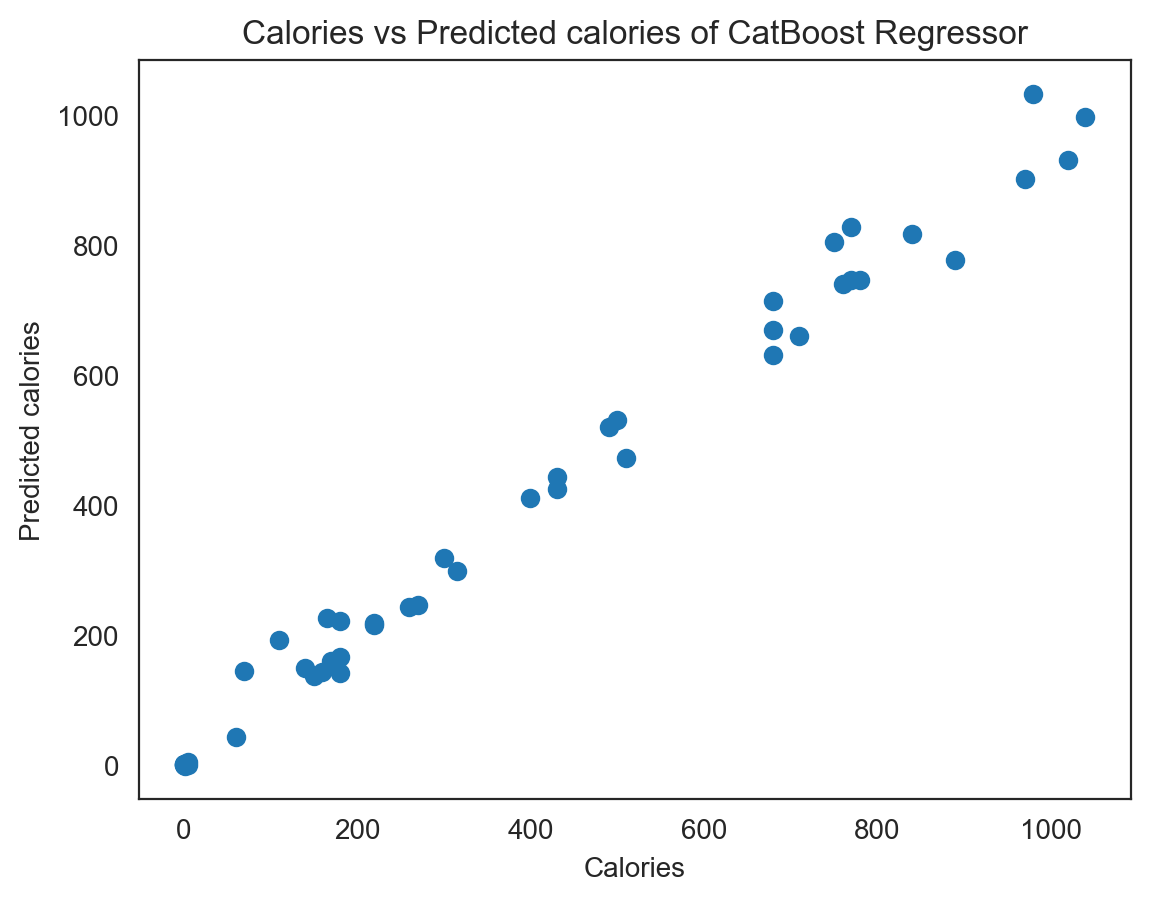

In [206]:
# compare y_test and y_predict by using scatter plot 
plt.scatter(y_test, y_pred_test_cb)
plt.xlabel('Calories')
plt.ylabel('Predicted calories')
plt.title("Calories vs Predicted calories of CatBoost Regressor");

## Evaluation and comparision of all the models
### Version 1 : Before remove some features

In [146]:
models_comp = pd.DataFrame({
    'Model': ['LinearRegression', 'RidgeRegression', 'LassoRegression', 'ExtraTreesRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor', 'LightGBMRegressor', 'CatBoostRegressor'],
    'R-squared_before': [lm_r1, rr_r, ls_r, etr_r, rfr_r, gb_r, lgbm_r, cb_r],
    'MSE': [lm_mse1, rr_mse, ls_mse, etr_mse, rfr_mse, gb_mse, lgbm_mse, cb_mse]
})
models_comp.sort_values('R-squared_before', ascending=False).reset_index(drop=True)

Model  R-squared_before       MSE
0          CatBoostRegressor           0.98617  1521.832
1            LassoRegression           0.98384  1777.325
2            RidgeRegression           0.98356  1808.213
3           LinearRegression           0.98349  1816.428
4        ExtraTreesRegressor           0.97943  2262.694
5  GradientBoostingRegressor           0.97742  2484.007
6      RandomForestRegressor           0.97256  3018.284
7          LightGBMRegressor           0.93603  7037.950

When comparing all 8 models based on R-squared and MSE values it was found that the most accurate prediction model was CatBoost Regressor, which was able to predict test data with an accuracy of 0.98617, followed by Lasso Regression, Ridge Regression, and Linear Regression. The R-squared values was not very different. Additionally, the ExtraTrees Regressor model, the R-squared value was not much different from the RandomForest Regressor model. It can be said that both models perform equally well.

However, for the LightGBM Regressor that predicted test data, the R-squared result was less than GradientBoosting Regressor, even though the LightGBM Regressor model had higher prediction efficiency than GradientBoosting Regressor. From additional study, the results came out as like that because the reason may be that the working principle of LightGBM Regressor is to adjust the size of the data. This may be more likely to overfitting the data than GradientBoosting Regressor. The smaller the data set,  overfitting can cause the R-squared value to decrease in the test data.

# **Find Feature Importance**
As the CatBoost Regressor model demonstrated the highest accuracy, so I selected it to find the feature importance values.

In [210]:
# show model parameters
model_cb.feature_importances_ 

array([19.48494039, 14.97238169,  2.67760594,  5.17671716,  9.89990732,
       23.99658543,  3.72186991,  5.5743062 , 14.49568597])

In [243]:
# Feature Importance of CatBoost Regressor
pd.DataFrame({'Feature': x_train.columns, 'Importances': model_cb.feature_importances_}).sort_values(by='Importances', ascending=False).reset_index(drop=True)

Feature  Importances
0   total_carb    23.996585
1    total_fat    19.484940
2      sat_fat    14.972382
3      protein    14.495686
4       sodium     9.899907
5       sugars     5.574306
6  cholesterol     5.176717
7        fiber     3.721870
8    trans_fat     2.677606

From the feature importance determination, it was found that the feature 'total_carb' was the most important, followed by 'total_fat', 'sat_fat', and 'protein'. This aligns with the fact that most calories come from the macronutrients: fat, carbohydrates, and proteins. This is another proof that the CatBoost Regressor model is accurate in prediction.

From the experiment of removing features, by selecting the feature based on lowest value first, and selecting from 1 to 5 features to find the R-squared value, it was determined that selecting out the 3 features with the lowest values resulted in the highest R-squared values compared to the others. Therefore, the columns selected to remain in the training and test data are 'total_carb', 'total_fat', 'sat_fat', 'protein', 'sodium', and 'sugars' (6 columns).

In [245]:
x_train_2 = x_train[['total_fat', 'sat_fat', 'sodium', 'total_carb', 'sugars', 'protein']]
x_test_2 = x_test[['total_fat', 'sat_fat', 'sodium', 'total_carb', 'sugars', 'protein']]

# fit the model to the training data
model_cb.fit(x_train_2, y_train, verbose=False)

# predict on the testing data
y_pred_test_cb2 = model_cb.predict(x_test_2)

# evaluate errors
cb2_r = r2_score(y_test, y_pred_test_cb2).round(5)
cb2_mae = mean_absolute_error(y_test, y_pred_test_cb2).round(3)
cb2_mse = mean_squared_error(y_test, y_pred_test_cb2).round(3)
cb2_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_cb2)).round(3)
print('R^2:', cb2_r)
print('MAE:', cb2_mae)
print('MSE:', cb2_mse)
print('RMSE:', cb2_rmse)

R^2: 0.99204
MAE: 22.309
MSE: 875.413
RMSE: 29.587


In [219]:
# compare between before and after remove some features 
c8 = [
    {'R-squared': cb_r, 'MAE':cb_mae, 'MSE':cb_mse, 'RMSE':cb_rmse},
    {'R-squared': cb2_r, 'MAE':cb2_mae, 'MSE':cb2_mse, 'RMSE':cb2_rmse}
]
c88 = pd.DataFrame(c8).T
c88.rename(columns={0:'Before', 1:'After'})

Before      After
R-squared     0.98617    0.99204
MAE          28.48300   22.30900
MSE        1521.83200  875.41300
RMSE         39.01100   29.58700

The R-squared value of the CatBoost Regressor increased from 0.98617 to 0.99204. Despite the R-squared value increasing by 0.00587, the MSE dropped as much as 646.419, considered a decrease from 42.476%.

Next, I tried this with other models by selecting features according to the CatBoost Regressor model, namely 'total_fat', 'sat_fat', 'sodium', 'total_carb', 'sugars', 'protein'.

### Version 2

In [226]:
models = [
    [lm, 'LinearRegression'],
    [ridge_model, 'RidgeRegression'],
    [lasso_model, 'LassoRegression'],
    [model_etr, 'ExtraTreesRegressor'],
    [model_rfr, 'RandomForestRegressor'],
    [model_gb, 'GradientBoostingRegressor'],
    [model_lgbm, 'LightGBMRegressor'],
    [model_cb, 'CatBoostRegressor']
]

model_scores = []
for a in models:
    model = a[0]
    model.fit(x_train_2, y_train)
    y_pred_test = model.predict(x_test_2)
    score = r2_score(y_test, y_pred_test).round(5)
    mse = mean_squared_error(y_test, y_pred_test).round(3)
    model_scores.append([a[1], score, mse])
    print(f'{a[1]:30} R-squared: {score:8} MSE: {mse:8}')

LinearRegression               R-squared:  0.98015 MSE: 2183.951
RidgeRegression                R-squared:  0.98017 MSE: 2181.605
LassoRegression                R-squared:  0.98034 MSE: 2162.951
ExtraTreesRegressor            R-squared:  0.98272 MSE: 1900.987
RandomForestRegressor          R-squared:  0.97582 MSE: 2660.028
GradientBoostingRegressor      R-squared:  0.96588 MSE: 3753.673
LightGBMRegressor              R-squared:  0.93866 MSE: 6747.782
CatBoostRegressor              R-squared:  0.99204 MSE:  875.413


In [227]:
models_comp2 = pd.DataFrame(model_scores, columns=['Model', 'R-squared_after', 'MSE'])
models_comp2.sort_values(by='R-squared_after', ascending=False).reset_index(drop=True)

Model  R-squared_after       MSE
0          CatBoostRegressor          0.99204   875.413
1        ExtraTreesRegressor          0.98272  1900.987
2            LassoRegression          0.98034  2162.951
3            RidgeRegression          0.98017  2181.605
4           LinearRegression          0.98015  2183.951
5      RandomForestRegressor          0.97582  2660.028
6  GradientBoostingRegressor          0.96588  3753.673
7          LightGBMRegressor          0.93866  6747.782

### Compare R-squared version 1 and version 2

In [228]:
models_comp3 = pd.concat([models_comp.iloc[:, :2], models_comp2.iloc[:, 1]], axis=1)
models_comp3['Diff'] = models_comp3['R-squared_after'] - models_comp3['R-squared_before']
models_comp3.sort_values('R-squared_after', ascending=False).reset_index(drop=True)

Model  R-squared_before  R-squared_after     Diff
0          CatBoostRegressor           0.98617          0.99204  0.00587
1        ExtraTreesRegressor           0.97943          0.98272  0.00329
2            LassoRegression           0.98384          0.98034 -0.00350
3            RidgeRegression           0.98356          0.98017 -0.00339
4           LinearRegression           0.98349          0.98015 -0.00334
5      RandomForestRegressor           0.97256          0.97582  0.00326
6  GradientBoostingRegressor           0.97742          0.96588 -0.01154
7          LightGBMRegressor           0.93603          0.93866  0.00263

In [229]:
# select only the models that increase R-square
models_comp3[models_comp3['Diff'] > 0].sort_values('R-squared_after', ascending=False).reset_index(drop=True)

Model  R-squared_before  R-squared_after     Diff
0      CatBoostRegressor           0.98617          0.99204  0.00587
1    ExtraTreesRegressor           0.97943          0.98272  0.00329
2  RandomForestRegressor           0.97256          0.97582  0.00326
3      LightGBMRegressor           0.93603          0.93866  0.00263

When selecting specific features and training with other models, only 4 out of 8 models had an increase in R-squared values. while the other models had decreased R-squared values. The models with increased R-squared values include CatBoost Regressor, ExtraTrees Regressor, RandomForest Regressor and LightGBMRegressor. Removing some of the same features and finding the R-squared value does not mean the same increase in R-squared value results. Therefore, selecting features must also be taken into account when choosing a model.

# **Conclusion**
In experiment predicting food calories using 8 models and analyzing feature importance, I found that the model that predicted test data with the highest R-squared value was CatBoost Regressor. When we used the CatBoost Regressor to analyze feature importance and then predicted new test data by removing some features, we obtained a higher R-squared value than before. However, when we tried the other models, only 4 models showed an increase in R-squared values. In summary, for predicting food calories, the CatBoost Regressor model is the most effective in predicting among other Regression models.

# **Recommendation**
**The recommendations from this modeling**
* This model can be used to analyze the calories of foods and compare them with the actual calculated calorie values. To check the accuracy of the information This serves as a means of verifying the accuracy of the information provided to the customer. and ensure that data is not manipulated.
* From the previous point, the model can be used to analyze and compare the nutritional value of competing food items. To check the accuracy of information provided by competitors.
* We can create a new menu by specifying the desired quantities of nutrients and then using the model to predict the calorie content. This will confirm that if we use these nutrient quantities, the number of calories obtained will be similar to what was expected. To meet business objectives and help in planning next steps.

**The recommendations for the next modeling**  
From nutritional information, each type of nutrient provides energy as follows:
* Carbohydrates 4 calories per gram
* Protein 4 calories per gram
* Fat 9 calories per gram (some fatty acids provide different amounts of energy)
* Alcohol 7 calories per gram

This data set includes the following food categories: Burgers, Chicken, Breakfast, Flat -Top Dogs, Fries, Shakes, Floats, Cups, Drinks and Beer & Wines.  
Additional things to recommend are as follows:
* Alcohol content data should also be used in modeling. This is because there is a menu of alcoholic beverages mixed in the data used in the model but no alcohol content data was collected. May make the prediction of calories not as effective as it should be
* If larger and more diverse data were used, the model might make more accurate predictions.

# **References**
- https://www.codecademy.com/courses/eda-exploratory-data-analysis-python/lessons/data-summaries/exercises/visualizing-quantitative-variables. (n.d.). Codecademy. Retrieved April 1, 2024, from https://www.codecademy.com/courses/eda-exploratory-data-analysis-python/lessons/data-summaries/exercises/visualizing-quantitative-variables  
- EDA: Exploratory Data Analysis | Introduction to Exploratory Data Analysis. (2021, February 12). Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/02/introduction-to-exploratory-data-analysis-eda/
- EDA To Prediction(DieTanic). (n.d.). Kaggle.com. https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic
- ลิเนียร์รีเกรสชั่น (Linear Regression). (n.d.). Dsdi.msu.ac.th. Retrieved April 1, 2024, from https://dsdi.msu.ac.th/?article=data-science&fn=linear-regression
- Statistics with Excel ตอนที่ 6 : Hypothesis Testing - Thep Excel. (2020, June 22). https://www.thepexcel.com/stats-06-hypothesis-testing/
- Peachapong Poolpol. (n.d.). Medium. Retrieved April 1, 2024, from https://peachapong-poolpol.medium.com/
- Thanapatpisarn, P. (2021, September 5). สร้าง Prediction Model ด้วย Linear Regression Part1. Medium. https://datascihaeng.medium.com/data-science-modeling-01-64516666bc6d 
- บันทึก training data science EP 13: Regularization – Optimization ด้วย Regularization. (2020, September 2). Bluebirz.net. https://www.bluebirz.net/th/note-of-data-science-training-ep-13-th/ 
- Boston house price prediction. (n.d.). Kaggle.com. https://www.kaggle.com/code/shreayan98c/boston-house-price-prediction 
- Witchapong Daroontham – Medium. (n.d.). Medium. https://medium.com/@witchapongdaroontham/
- Feature Importance In Decision Tree | Sklearn | Scikit Learn | Python | Machine Learning | Codegnan. (n.d.). Www.youtube.com. Retrieved January 23, 2024, from https://www.youtube.com/watch?v=7v4Qdm5v9aA
- สอน Machine Learning: การหา feature importance ด้วย tree classifier ใน scikit-learn. (n.d.). Www.youtube.com. Retrieved April 1, 2024, from https://www.youtube.com/watch?v=Uojkhn-EXac&t=62s 
- Hello คุณหมอ l ข้อมูลสุขภาพที่ได้รับการยืนยันทางการแพทย์. (n.d.). Hello Khunmor. https://hellokhunmor.com/ 
- sklearn.ensemble.ExtraTreesRegressor. (n.d.). Scikit-Learn. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html
- Team, F. F. I. (2022, August 4). FINNOMENA Best-In-Class: รู้จักโมเดลเบื้องหลัง คัดที่สุดของกองทุนในแต่ละหมวด. FINNOMENA. https://www.finnomena.com/finnomena-ic/light-gradient-boosting-machine-model/
- Calories - Fat, Protein, Carbohydrates, Alcohol. Calories per gram. (n.d.). Www.nutristrategy.com. https://www.nutristrategy.com/nutrition/calories.htm